# Analyzing Lending Club Loan Data: EDA and Predictive Modeling


**Table of Contents** <a id="top"></a>

1. [Part 1: Introduction](#1.1) <br>
    1.1 [Data Dictionary](#1.1.1) <br>
    1.2 [Data Loading](#1.1.2) <br> 
    1.3 [Summary Statistics of Dataset](#1.1.3) <br>
    
2. [Part 2 : Data Cleaning](#1.2) <br>
    2.1 [Unique values](#1.2.1) <br>
    2.2 [Target Variable](#1.2.2) <br>
    2.3 [Duplicates](#1.2.3) <br>
    2.4 [Null Values](#1.2.4) <br>
    2.5 [Feature Engineerings](#1.2.5) <br>
    2.6 [Drop Non-essential features](#1.2.6) <br>
    
3. [Part 3: Exploratory Data Analysis](#1.3) <br>
    3.1 [Numerical Columns](#1.3.1) <br>
    3.2 [Univariate Distribution](#1.3.2) <br>
    3.3 [Box Plots of Numerical Features grouped by Loan Status](#1.3.3) <br>
       
4. [Part 4: Modeling](#1.4) <br>
    4.1 [Train/Test Split and Scaling](#1.4.1) <br>
    4.2 [Baseline Modeling - Logistic Regression](#1.4.3) <br>
    4.3 [Upsampling with SMOTE](#1.4.3) <br>
    4.4 [Logistic Regression](#1.4.4) <br>
    4.5 [Decision Trees](#1.4.5) <br>
    4.6 [XGBoost](#1.4.6) <br>
    4.7 [CatBoost](#1.4.7) <br>
    4.8 [Pipeline and GridSearchCV](#1.4.8) <br>
    4.9 [Hyper-parameter Tuning](#1.4.9) <br>   
    
5. [Advanced Modeling with Recall Score](#1.5) <br>
    5.1 [Recall Scores with best models from GridSearchCV](#1.6.1) <br>
    5.2 [XGBoost](#1.5.2) <br>
    5.3 [CatBoost](#1.5.3) <br>
    5.4 [Decision Trees](#1.5.4) <br>
    5.5 [Logistic Regression](#1.5.5) <br>
    5.6.[Model Coefficients - Logistics Regression](#1.5.6) <br>
    5.7 [Neural Networks](#1.5.7) <br>
    
6. [Conclusion](#1.6) <br>
7. [Next Steps](#1.7) <br>
    

## Part 1 : Introduction

In 2005, the world's first peer-to-peer lender(P2P) was founded in the UK. Soon after, two prominent P2P lending institutions started in the US. One of them was Lending Club, which still exists today in a different business model. During the financial crisis 2008, the credit market became less functional as Lenders has become conservative. At the time, there was crisis of confidence in established financial insitutions and this was instrumental for the growth of P2P lending. At it's peak, Lending club was the largest P2P lender in the world, with assets of ~16 billion USD by 2015-16. 

**What is P2P Lending?**
"Peer-to-peer lending (P2P) is an innovative form of borrowing and investing money without the involvement of traditional financial institutions. Using online platforms, borrowers and lenders can make mutually beneficial transactions directly without the need a bank as an intermediary.

**How does it work?**
"Peer-to-peer (P2P) lending works by connecting borrowers who need money with lenders who want to make a return on their investments. Borrowers submit loan requests to the peer-to-peer lender, and investors compete to finance the loans in exchange for an interest rate. From start to finish, P2P sites manage the entire process, including rating creditworthiness, loan servicing, payments, and collections" - [p2pmarketdata](https://p2pmarketdata.com/articles/p2p-lending-explained/)

The Lending Club platform had offered personal and small business loans ranging from 500 USD to 40000 USD. To attract more investors, Lending Club had made its loan dataset public so that investors can make an informed choice on whether to invest in a a specific loan asset. 

We will use the Lending Club dataset to build a model to help predict, whether a specific loan would be repaid in full or not. 

This Jupyter notebook is part of my Capstone project under the Data Science Diploma Program at BrainStation, Vancouver. In this notebook, we use popular python Python libraries to analyze a dataset of Lending Club. The loans dataset contains 27 features of more than 300,000 loans availed by borrowers through Lending Club spanning from 2007 to 2018. Types of features captured in the dataset are loan-specific features, borrower-specific personal and financial details. The key feature in the dataset is `loan_status`, which is our target variable and has two values 'Fully Paid' or 'Charged Off'. 'Fully Paid' implies loan was fully repaid. 'Charged Off' implies there was default or short payment by borrower and corresponding investors had to write off atleast part of the loan. All these loans featured in the dataset were closed loans and no running loans were captured in this dataset.

The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/jeandedieunyandwi/lending-club-dataset/code?datasetId=608703&sortBy=voteCount).

In this note, we will perform EDA, visualize data. since this is a classification problem, machine learning models like Logistic Regression, Decision trees will be helpful to predict performance of loans. 

**Business Problem**

In Banking and financial Lending, one of the issues of frustration for borrowers is the time taken by Lending institutions to approve a loan request. This process can span several days to weeks before the borrower receives confirmation of approval or denial. During this uncertain waiting period, and in pursuit of more favorable loan terms, borrowers often apply for the same loan with multiple lenders. 

Consequently, it is in the lender's best interest to quickly process and communicate the loan offer details. Speedy approvals not only improve customer experience but also mitigate the risk of potential borrowers opting for competing lenders.

**For Consumer and Small Business Loans:** If we build an application that takes preliminary loan attributes from a borrower as inputs, and instantly provides a prediction of the outcome for that loan request, it would greatly benefit both borrowers and Lenders. This system has the potential to significantly increase productivity at the lending institution, and could translate into higher revenues and profits. 

**For Commercial Loans:** A 'Loan Performance Prediction' system would be beneficial for commercial lenders, enabling them to swiftly provide preliminary offers on business loans. In practice, it takes many days to provide in-principle offers to borrowing companies and these requests are often time-sensitive due to the competitive nature of loan markets. In anycase, the system can be helpful as a support system for Credit approvals. This system could theoritcally increase the quality and confidence of credit decisions and carries the potential to reduce the non-performing loans for Lenders, and thus translate to higher margins. 

This application can be powered by a machine learning model trained on a large dataset of historical loan performance data. With this foundation, let's dive into the analysis and model building process.

### Data-Dictionary

| S.No | Column Name           | Description                                                                                                 |
|------|-----------------------|-------------------------------------------------------------------------------------------------------------|
| 0    | loan_amount           | The listed amount of the loan in USD applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
| 1    | term                  | The number of payments on the loan. Values are in months and can be either 36 or 60.                          |
| 2    | int_rate              | Interest Rate on the loan                                                                                    |
| 3    | installment           | The monthly payment owed by the borrower                                                                    |                                           
| 4    | grade                 | Lending Club assigned loan grade                                                                                      |
| 5    | sub_grade             | Lending Club assigned loan subgrade                                                                                   |
| 6    | emp_title             | The job title supplied by the Borrower when applying for the loan.                                          |   
| 7    | emp_length            | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
| 8    | home_ownership        | The homeownership status provided by the borrower during registration or obtained from the credit report. The values are: RENT, OWN, MORTGAGE, OTHER|
| 9    | annual_inc            | The self-reported annual income provided by the borrower during registration.                                 |
| 10   | verification_status   | Indicates if income was verified by LC, not verified, or if the income source was verified                    |
| 11   | issue_d               | The month which the loan was funded                                                                         |
| 12   | loan_status           | Current status of the loan                                                                                 |
| 13   | purpose               | A category provided by the borrower for the loan request.                                                   |
| 14   | title                 | The loan title provided by the borrower                                                                    |
| 15   | zip_code              | The first 3 numbers of the zip code provided by the borrower in the loan application.                         |
| 16   | addr_state            | The state provided by the borrower in the loan application                                                  |
| 17   | dti                   | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
| 18   | earliest_cr_line      | The month the borrower's earliest reported credit line was opened                                            |
| 19   | open_acc              | The number of open credit lines in the borrower's credit file.                                               |
| 20   | pub_rec               | Number of derogatory public records                                                                        |
| 21   | revol_bal             | Total credit revolving balance                                                                             |
| 22   | revol_util            | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
| 23   | total_acc             | The total number of credit lines currently in the borrower's credit file                                     |
| 24   | initial_list_status   | The initial listing status of the loan. Possible values are – W, F. W stands for Whole loan and F stands for fractional.                                           |
| 25   | application_type      | Indicates whether the loan is an individual application or a joint application with two co-borrowers         |
| 26   | mort_acc              | Number of mortgage accounts.                                                                               |
| 27   | pub_rec_bankruptcies  | Number of public record bankruptcies 

### Data Loading

In [1]:
#Import the required libraries

import numpy as np # Linear alzebra
import pandas as pd # Data manipulation

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import hvplot.pandas 

# import library to filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read CSV using pandas and name data fram as raw_df
raw_df = pd.read_csv("lending_club_loan_two.csv")

In [3]:
# Check for the size of the dataset
raw_df.shape

(396030, 27)

Data frame has 396030 rows or observations and 27 columns

In [4]:
# Change the default pandas dataframe display option to enable viewing all columns of the dataframe
pd.set_option('display.max_columns', None) # This option is enabled to look at all the columns in a data frame

In [5]:
# Take a glimpse of the dataframe
raw_df.head(5)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [6]:
# Check the column names and data types
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Feature Engineering**: 
1. New columns `month` and `year` could be extracted from `issue_d` column  
2. New columns `city`, `state` and `pincode` could be extracted from `address` column 
3. New column `inc_by_loan` = (`annual_inc`)/(`loan_amnt`) could be calculated.
4. New column `debt` = `dti` * `annual_inc` could be calculated


### Summary Statistics of Dataset

In [7]:
# Calculate brief summary statistics
raw_df.describe().round().T

count     mean      std    min      25%      50%  \
loan_amnt             396030.0  14114.0   8357.0  500.0   8000.0  12000.0   
int_rate              396030.0     14.0      4.0    5.0     10.0     13.0   
installment           396030.0    432.0    251.0   16.0    250.0    375.0   
annual_inc            396030.0  74203.0  61638.0    0.0  45000.0  64000.0   
dti                   396030.0     17.0     18.0    0.0     11.0     17.0   
open_acc              396030.0     11.0      5.0    0.0      8.0     10.0   
pub_rec               396030.0      0.0      1.0    0.0      0.0      0.0   
revol_bal             396030.0  15845.0  20592.0    0.0   6025.0  11181.0   
revol_util            395754.0     54.0     24.0    0.0     36.0     55.0   
total_acc             396030.0     25.0     12.0    2.0     17.0     24.0   
mort_acc              358235.0      2.0      2.0    0.0      0.0      1.0   
pub_rec_bankruptcies  395495.0      0.0      0.0    0.0      0.0      0.0   

                          75%        max  
loan_amnt             20000.0    40000.0  
int_rate                 16.0       31.0  
installment             567.0     1534.0  
annual_inc            90000.0  8706582.0  
dti                      23.0     9999.0  
open_acc                 14.0       90.0  
pub_rec                   0.0       86.0  
revol_bal             19620.0  1743266.0  
revol_util               73.0      892.0  
total_acc                32.0      151.0  
mort_acc                  3.0       34.0  
pub_rec_bankruptcies      0.0        8.0

1. **loan_amount** The average loan is ~14,113 USD. Min loan amount is 500.00 USD and max is 40,000.00 USD. 
2. **int_rate**	The interest rate on an average is 13.63%

## Data Cleaning

### Unique values

In [8]:
# Percentage of unique values in columns, which

# Calculate number of unique values in each column of data frame
unique_values = raw_df.nunique()

# Calculate total values in each column
count_values  = raw_df.count()

# Calculate percentage of unique values and sort the values in descending order
percentage_unique_values = (unique_values * 100 / count_values).sort_values(ascending = False)

# Print the percentages, rounded to one decimal
display(percentage_unique_values.round())

address                 99.0
emp_title               46.0
installment             14.0
revol_bal               14.0
title                   12.0
annual_inc               7.0
dti                      1.0
loan_amnt                0.0
revol_util               0.0
earliest_cr_line         0.0
int_rate                 0.0
total_acc                0.0
issue_d                  0.0
open_acc                 0.0
mort_acc                 0.0
sub_grade                0.0
pub_rec                  0.0
purpose                  0.0
emp_length               0.0
pub_rec_bankruptcies     0.0
grade                    0.0
home_ownership           0.0
application_type         0.0
verification_status      0.0
term                     0.0
loan_status              0.0
initial_list_status      0.0
dtype: float64

**Observations**

* Any column having high percentage of unique values makes it difficult to summarise and analyse. Further, it is difficult to apply encoding.  
* `address`:  99% percent of addresses are unique. We may drop this column after we extract city, state and pin code values. We 
* `emp_title`: 46% percent of employee titles are unique. Similar to address, employee title column is not useful for analysis and may be dropped.

In [9]:
# Drop column 'emp_title'
raw_df = raw_df.drop(columns = ['emp_title'])

### Target Variable

For this dataset, loan_status is chosed as the target variable. Lets the all the unique values in the target variable.


In [10]:
raw_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

`loan_status` takes binary values "Fully Paid" and "Charged Off"

"Fully Paid" signifies that the borrower has completely repaid the loan.

"Charged Off" indicates that the loan has not been fully repaid, resulting in a portion being written off.

To run statistical analysis, we represent these strings numerically. 

In this notebook, "Charged Off" is assigned value 1 and "Fully Paid" is assigned the value 0.

In [11]:
# Use Map function to assign 'Charged Off' to 1 and 'Fully Paid' to 0 in the 'loan_status' column
raw_df['loan_status_num'] = raw_df['loan_status'].map({'Fully Paid': 0,'Charged Off': 1 })

### Duplicates

In [12]:
# check for duplicate rows
raw_df.duplicated().sum() 

0

There are no duplicate rows in the dataset.

### Null Values

In [13]:
# Calculate the number of nulls in each column
columns_null_count = raw_df.isna().sum(axis=0)

# Total rows in data frame
total_rows = raw_df.shape[0]

# Calculate percentage of nulls and apply filter of non-zero null count in column
percentage_of_nulls = (columns_null_count * 100 / total_rows).round(2)

# Filter columns with non-zero null count
non_zero_nulls = percentage_of_nulls[percentage_of_nulls != 0]

# Print percentage of nulls in the columns having null values decreasing order
print(non_zero_nulls.sort_values(ascending = False))

mort_acc                9.54
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dtype: float64


 **Observations:** 
 
 * The columns with nulls are `mort_acc`,`emp_length`,`title`,`pub_rec_bankruptcies`, `revol_util`,`emp_title`
 * Column `mort_acc` has 9.54% of its values as null. 
 * Column `emp_title` and column `emp_length` has a fair percentage (5.79% and 4.62% respectively) of its values as null.
 * Column `title` has 0.44% of its values as null.
 * Column `emp_title` is to be deleted due to high percentage of unique values, as seen earlier.
 * Columns `revol_util` and `pub_rec` have a relatively insignificant percentage nulls

**Handle Null Values**
* For columns `revol_util` and `pub_rec_bankruptcies`: These columns have low percentage of null values. We may remove the rows with null values in these columns. 
* There are null values in columns emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies. These nulls have to handled appropriately.

**I. Null values in `revol_util` and `pub_rec_bankruptcies`**

In [14]:
# Use dropna()method to drop rows with NA values in columns `revol_util` and `pub_rec_bankruptcies`
raw_df = raw_df.dropna(subset=['revol_util', 'pub_rec_bankruptcies'])

We have removed the rows with NA values in columns `revol_util` and `pub_rec_bankruptcies`. 

**II. Null values in `emp_length`**

In [15]:
# Number of unique values in emp_length
print(f"Column `emp_length` has {raw_df['emp_length'].nunique()} unique values \n") 

# List the categories of unique values in emp_length
print(f"The categories are as under: \n\n {raw_df['emp_length'].unique()}")

Column `emp_length` has 11 unique values 

The categories are as under: 

 ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


Since `emp_length` has 4.62% of null values, it may not be prudent to remove the corresponding rows as we may lose important patterns in data. Let's examine how the distribution of `loan_status` is with respect to various categories of `emp_length` to understand how the distribution changes.

We use crosstab approach to understand this.

loan_status_num     0     1
emp_length                 
1 year           0.80  0.20
10+ years        0.82  0.18
2 years          0.81  0.19
3 years          0.80  0.20
4 years          0.81  0.19
5 years          0.81  0.19
6 years          0.81  0.19
7 years          0.81  0.19
8 years          0.80  0.20
9 years          0.80  0.20
< 1 year         0.79  0.21


<Axes: ylabel='emp_length'>

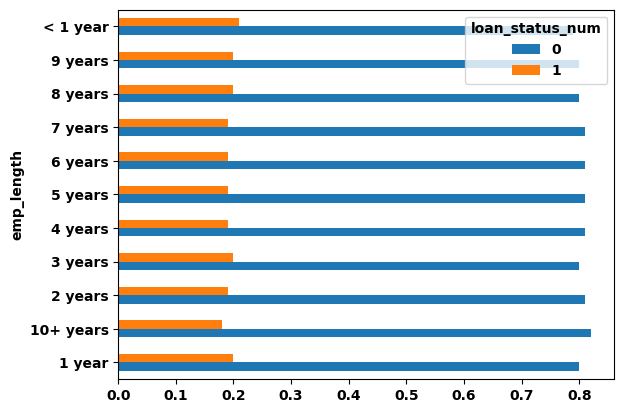

In [16]:
# Compute a simple cross tabulation of ''emp_length' and 'loan_status'. 
cross_tab = pd.crosstab(index=raw_df['emp_length'], columns=raw_df['loan_status_num'], normalize='index').round(2)

# print normalised porportions for each category of emp_length
print(cross_tab)

cross_tab.plot(kind = 'barh')

In [17]:
raw_df['emp_length_numeric'] = raw_df['emp_length'].map({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    None: None  # to handle NaN values
})

In [18]:
#  Check correlation between emp_length_numeric','emp_length'

raw_df[['emp_length_numeric','loan_status_num']].corr()

emp_length_numeric  loan_status_num
emp_length_numeric            1.000000        -0.013805
loan_status_num              -0.013805         1.000000

In [19]:
# Drop columns emp_length_numeric','emp_length'
raw_df = raw_df.drop(columns = ['emp_length_numeric','emp_length'])

The above data that the proportions are quite consistent across different employment lengths. This indicates that practical impact of `emp_length` on predicting `loan_status` is limited. We may proceed to remove this column.

**III. Null values in `title`**

In [20]:
# Calculate the top 5 most frequently ocurring categories in column 'title'
raw_df['title'].value_counts()[:5] 

Debt consolidation         152392
Credit card refinancing     51476
Home improvement            15245
Other                       12910
Debt Consolidation          11584
Name: title, dtype: int64

It looks like there are many duplicated categories. For instance, Debt consolidation is captured as different values. We can merge the categories to reduce the number of categories. 

Let us look at the `title` column and compare with `purpose` column.

In [21]:
raw_df[['purpose','title']].head()

purpose                    title
0            vacation                 Vacation
1  debt_consolidation       Debt consolidation
2         credit_card  Credit card refinancing
3         credit_card  Credit card refinancing
4         credit_card    Credit Card Refinance

We observe that it has values similar to the purpose column. Infact, the `purpose` column appears to have input validation control and `title` column has appears to be more customised text. We may proceed to remove the `title` column.

In [22]:
raw_df = raw_df.drop(columns = ['title'])

**IV. Null values in `mort_acc`**

In [23]:
raw_df[['mort_acc','loan_status_num']].corr()

mort_acc  loan_status_num
mort_acc         1.000000        -0.073048
loan_status_num -0.073048         1.000000

In [24]:
raw_df[['mort_acc','loan_status']].sample(5)

mort_acc  loan_status
69517        NaN   Fully Paid
216613       1.0   Fully Paid
178841       0.0   Fully Paid
225521       6.0   Fully Paid
287496       0.0  Charged Off

In [25]:
raw_df.corr()['mort_acc'].round(1)

loan_amnt               0.2
int_rate               -0.1
installment             0.2
annual_inc              0.2
dti                    -0.0
open_acc                0.1
pub_rec                 0.0
revol_bal               0.2
revol_util              0.0
total_acc               0.4
mort_acc                1.0
pub_rec_bankruptcies    0.0
loan_status_num        -0.1
Name: mort_acc, dtype: float64

In [26]:
raw_df['mort_acc'].value_counts()

0.0     139708
1.0      60384
2.0      49907
3.0      38022
4.0      27865
5.0      18182
6.0      11059
7.0       6050
8.0       3120
9.0       1653
10.0       863
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [27]:
# Filling nulls in column `mort_acc` with the mean value of the column
raw_df['mort_acc'].fillna(raw_df['mort_acc'].mean(), inplace=True)

In [28]:
# Check if all nulls have been removed
raw_df.isnull().sum() 

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_status_num         0
dtype: int64

We see all the nulls have been removed.

### Feature Engineering

#### Extract "State" from column `address`

In [29]:
raw_df['address'].sample(5)

391321        732 Timothy Cape\r\nSouth Angelaton, NE 05113
368138    7146 Daniel Highway Suite 833\r\nKristenside, ...
6259             99116 Smith Knoll\r\nWest Joshua, IN 00813
214607    81532 Alexander Roads\r\nPort Andrewton, OR 29597
38887          27931 Taylor Parkway\r\nMartinview, SC 70466
Name: address, dtype: object

We see that address has string format. We can use regular expessions to extract the relevant features city, state and pincode. For the purpose of this project, we will only extract `state` information.

In [30]:
# Import the module 're' helful for working regular experessions
import re

# Specify regular expression format for State and City code in the address string
state_pattern = r',\s(\w{2})\s\d+'

# Extract 'state' from 'address' column of the dataframe
raw_df['state'] = raw_df['address'].str.extract(state_pattern)


raw_df['state'].head()

0    OK
1    SD
2    WV
3    MA
4    VA
Name: state, dtype: object

#### Extract "Month" and "Year" from column "issue_d" 

In [31]:
# Extracting Month and Year from issue_d
raw_df['issue_d'] = pd.to_datetime(raw_df['issue_d'])
raw_df['month'] = raw_df['issue_d'].dt.month
raw_df['year'] = raw_df['issue_d'].dt.year

**Generate Insightful Financial Ratios and Debt Metrics from Existing Numerical Data**

In [32]:
# # Calculate Annual_Income/Loan Amount
# raw_df['income_by_loan_amnt'] = raw_df['annual_inc'] / raw_df['loan_amnt']

# # Calculate Annual_Income/Interest Rate
# raw_df['income_by_int_rate'] = raw_df['annual_inc'] / raw_df['int_rate']

# # Calculate Debt using dti and Annual_Income
# raw_df['debt'] = raw_df['dti'] * raw_df['annual_inc']

# # Display the updated dataframe
# print(raw_df.head())

Although the feature engineered numerical columns have the potential for use, we have not utilized them in this context as it would necessitate the removal of the original columns. As a next step for the project, we could test for these columns in the next phase of the project.

### Drop Non-Essential Features 

In [33]:
raw_df.sample(1)

loan_amnt        term  int_rate  installment grade sub_grade  \
44711    10000.0   36 months     16.89       355.99     D        D4   

      home_ownership  annual_inc verification_status    issue_d loan_status  \
44711       MORTGAGE     70000.0     Source Verified 2011-08-01  Fully Paid   

                purpose    dti earliest_cr_line  open_acc  pub_rec  revol_bal  \
44711  home_improvement  11.21         Jan-2006      10.0      0.0    19745.0   

       revol_util  total_acc initial_list_status application_type  mort_acc  \
44711        55.9       11.0                   f       INDIVIDUAL  1.813792   

       pub_rec_bankruptcies  \
44711                   0.0   

                                                 address  loan_status_num  \
44711  05061 Hester Orchard\r\nSouth Robertchester, K...                0   

      state  month  year  
44711    KS      8  2011

With a view to increase efficiency and work with optimised model, we have considered dropping some of the columns as below. 

1. `sub-grade`: We have alread considered `grade` as a feature. Further using sub-grade may not be helpful due to high number of sub-categories.
2. `earliest_cr_line`: From a business perspective, this feature is unlikely to have any impact on outcome variable.
3. `address`: we have already attacted the `state` information. We can drop the address column as it would not be useful for EDA.
4. `installment`: This column has high correlation with loan amount. Hence considered for removal.
5. `issue_d`: We have already extracted year and month from the column. 
6. `total_acc`: We already working with `mort_acc`, which may be more relevant.
7. `verification_status`: This variable is seen to have no impact on the ourcome variable.

In [34]:
drop_columns = ['sub_grade','earliest_cr_line', 'address','installment','issue_d','total_acc','verification_status']

raw_df = raw_df.drop(columns = drop_columns)

In [35]:
raw_df.head(1)

loan_amnt        term  int_rate grade home_ownership  annual_inc  \
0    10000.0   36 months     11.44     B           RENT    117000.0   

  loan_status   purpose    dti  open_acc  pub_rec  revol_bal  revol_util  \
0  Fully Paid  vacation  26.24      16.0      0.0    36369.0        41.8   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   

   loan_status_num state  month  year  
0                0    OK      1  2015

In [36]:
raw_df.nunique()

loan_amnt                1392
term                        2
int_rate                  532
grade                       7
home_ownership              6
annual_inc              27155
loan_status                 2
purpose                    14
dti                      4262
open_acc                   60
pub_rec                    20
revol_bal               55570
revol_util               1226
initial_list_status         2
application_type            3
mort_acc                   34
pub_rec_bankruptcies        9
loan_status_num             2
state                      51
month                      12
year                       10
dtype: int64

## Exploratory Data Analysis and Baseline Modeling

###  Numerical Columns

In [37]:
# Look for numeric columns in the dataframe
raw_df.select_dtypes("number").head()

loan_amnt  int_rate  annual_inc    dti  open_acc  pub_rec  revol_bal  \
0    10000.0     11.44    117000.0  26.24      16.0      0.0    36369.0   
1     8000.0     11.99     65000.0  22.05      17.0      0.0    20131.0   
2    15600.0     10.49     43057.0  12.79      13.0      0.0    11987.0   
3     7200.0      6.49     54000.0   2.60       6.0      0.0     5472.0   
4    24375.0     17.27     55000.0  33.95      13.0      0.0    24584.0   

   revol_util  mort_acc  pub_rec_bankruptcies  loan_status_num  month  year  
0        41.8       0.0                   0.0                0      1  2015  
1        53.3       3.0                   0.0                0      1  2015  
2        92.2       0.0                   0.0                0      1  2015  
3        21.5       0.0                   0.0                0     11  2014  
4        69.8       1.0                   0.0                1      4  2013

Since certain columns exhibited a significant right skew in their distributions, log transformation has been applied to these features, resulting in a more normalized distribution. 

**Log Transformation**

In [38]:
small_const = 1e-10

raw_df['loan_amnt'] = np.log(raw_df['loan_amnt'] + small_const)
raw_df['annual_inc'] = np.log(raw_df['annual_inc']+ small_const)
raw_df['int_rate'] = np.log(raw_df['int_rate']+ small_const)
raw_df['dti'] = np.log(raw_df['dti']+ small_const)
raw_df['revol_bal'] = np.log(raw_df['revol_bal']+ small_const)
raw_df['revol_util'] = np.log(raw_df['revol_util']+ small_const)
raw_df['mort_acc'] = np.log(raw_df['mort_acc']+ small_const)

### Univariate Distribution

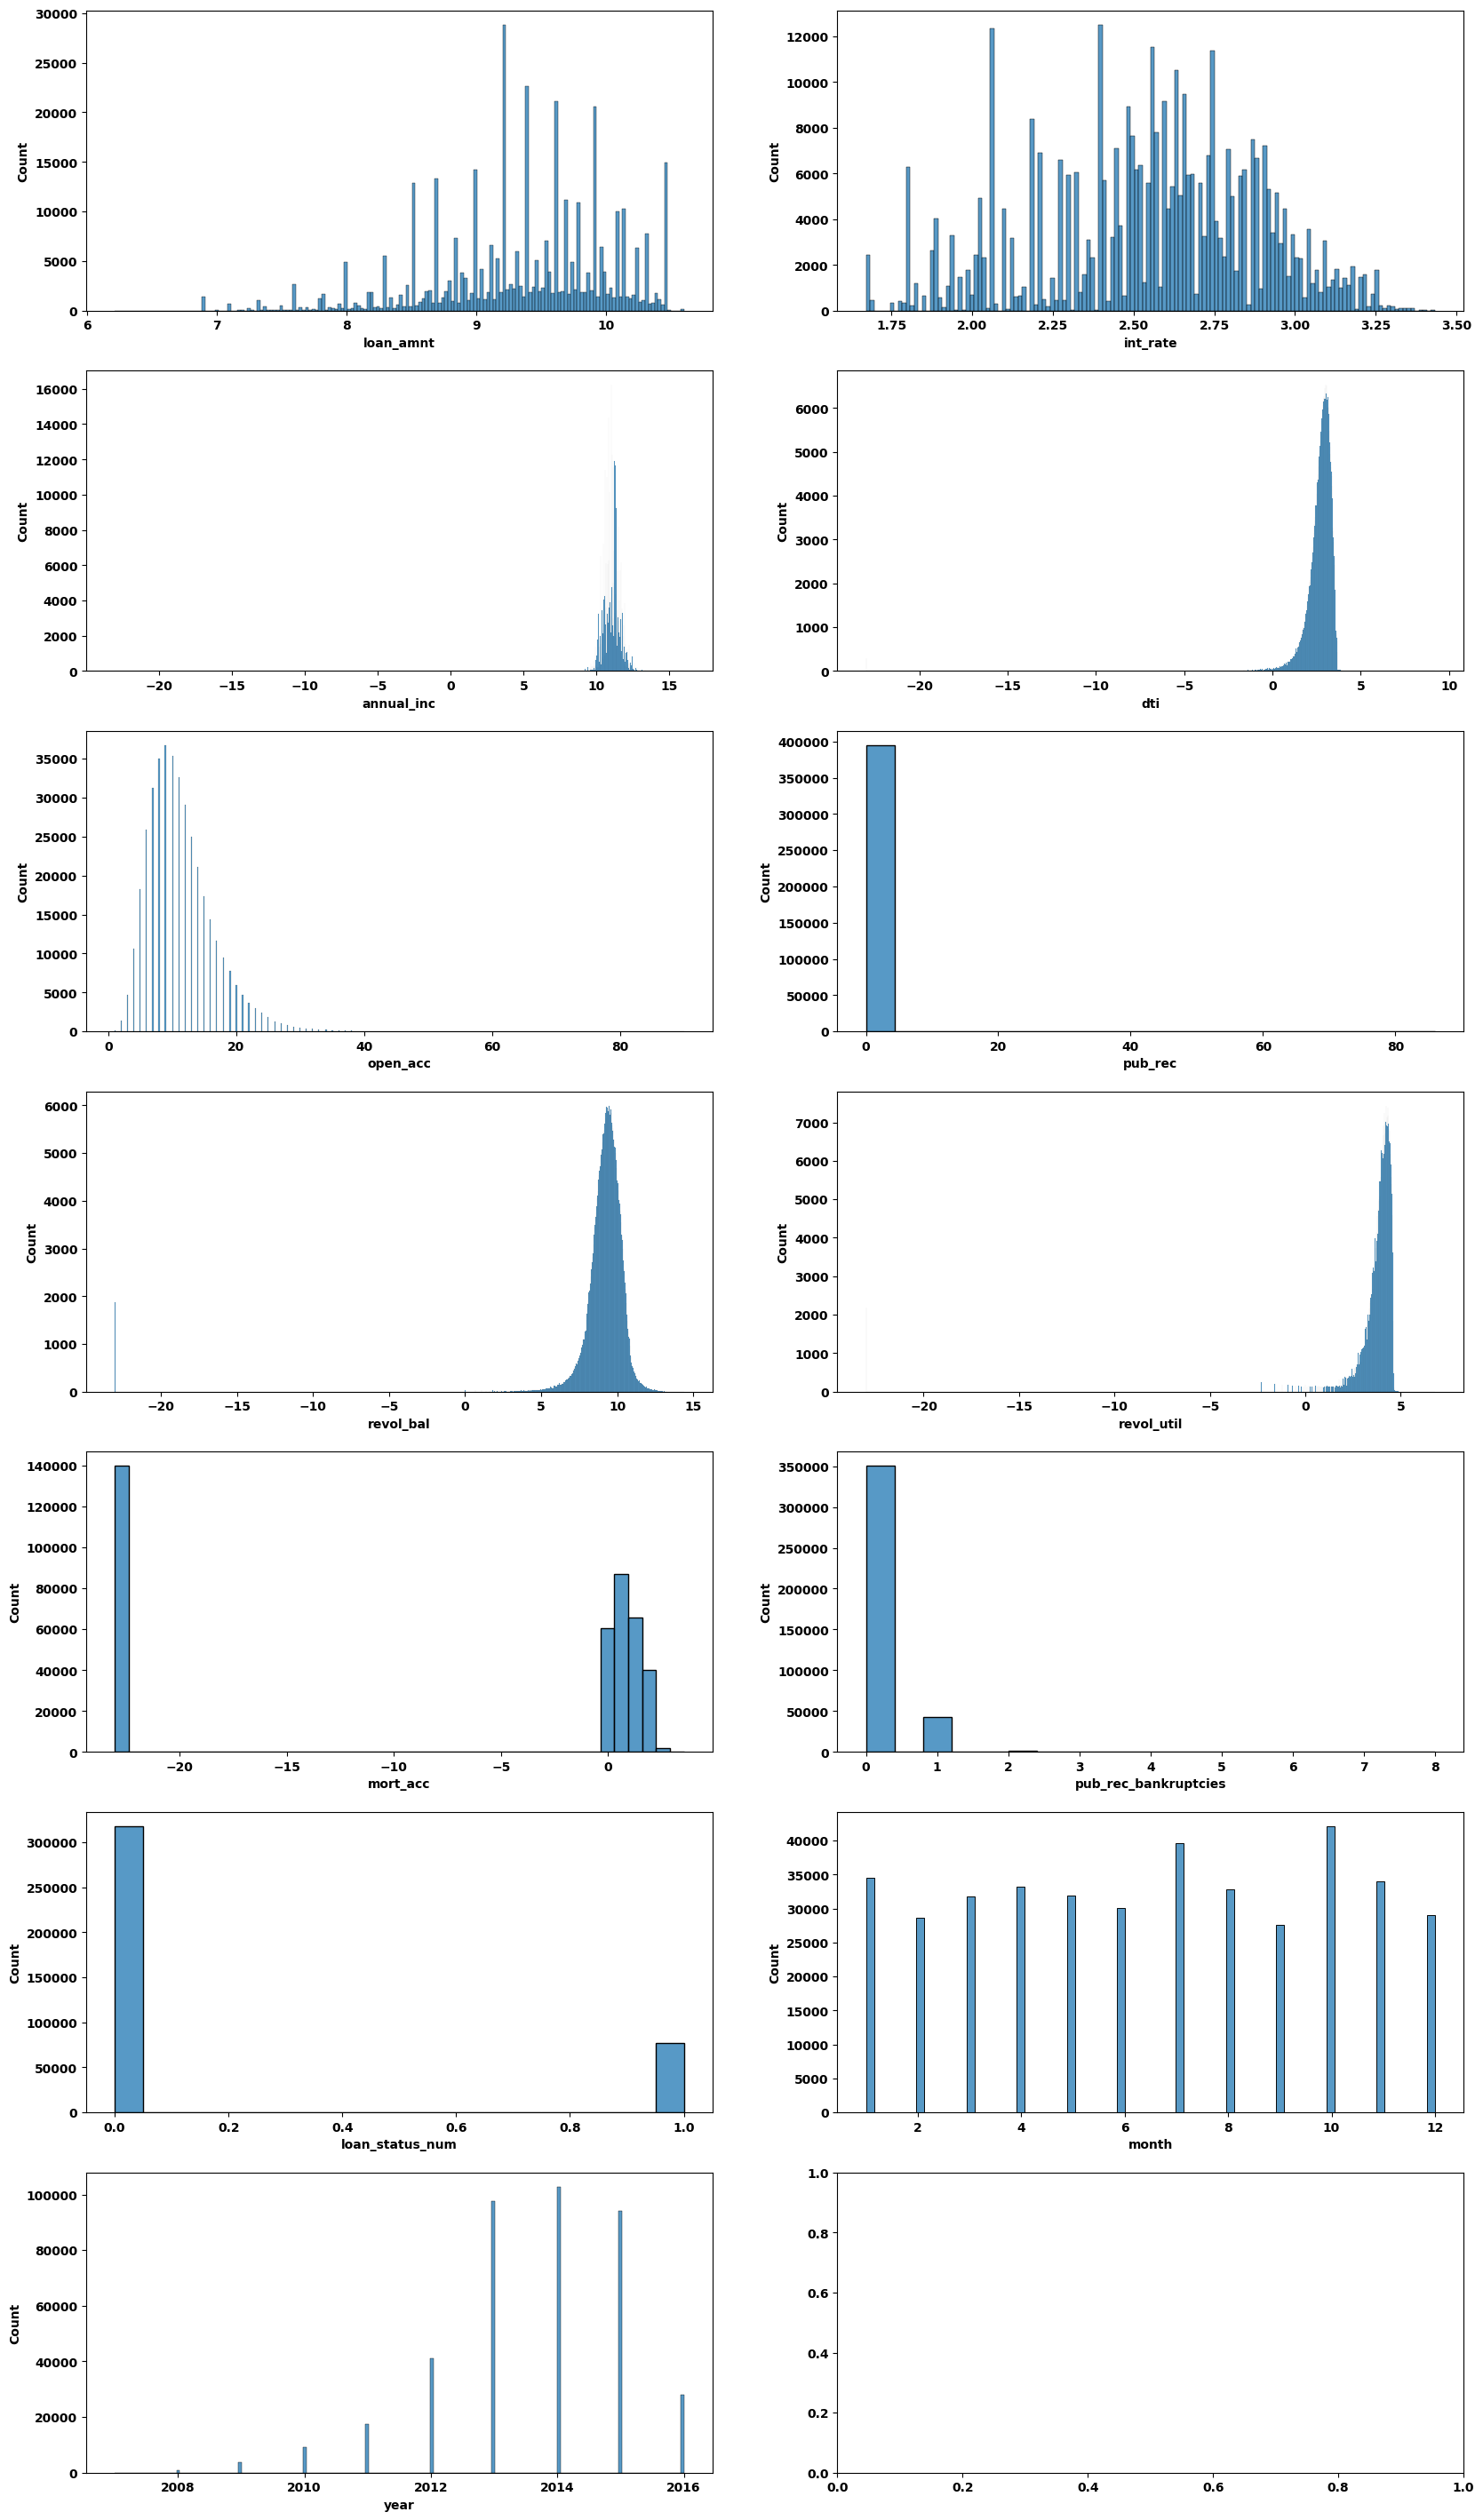

In [39]:
numeric_df = raw_df.select_dtypes("number")

plot_num = 1

plt.subplots(7,2, figsize=(20,36))

for col in numeric_df.columns:
    plt.subplot(7,2,plot_num)
    sns.histplot(raw_df[col])
    plot_num +=1

#plt.tight_layout()
plt.show()

We can retain all the numerical columns since they mostly exhibit a normal distribution.

<Figure size 2000x4000 with 0 Axes>

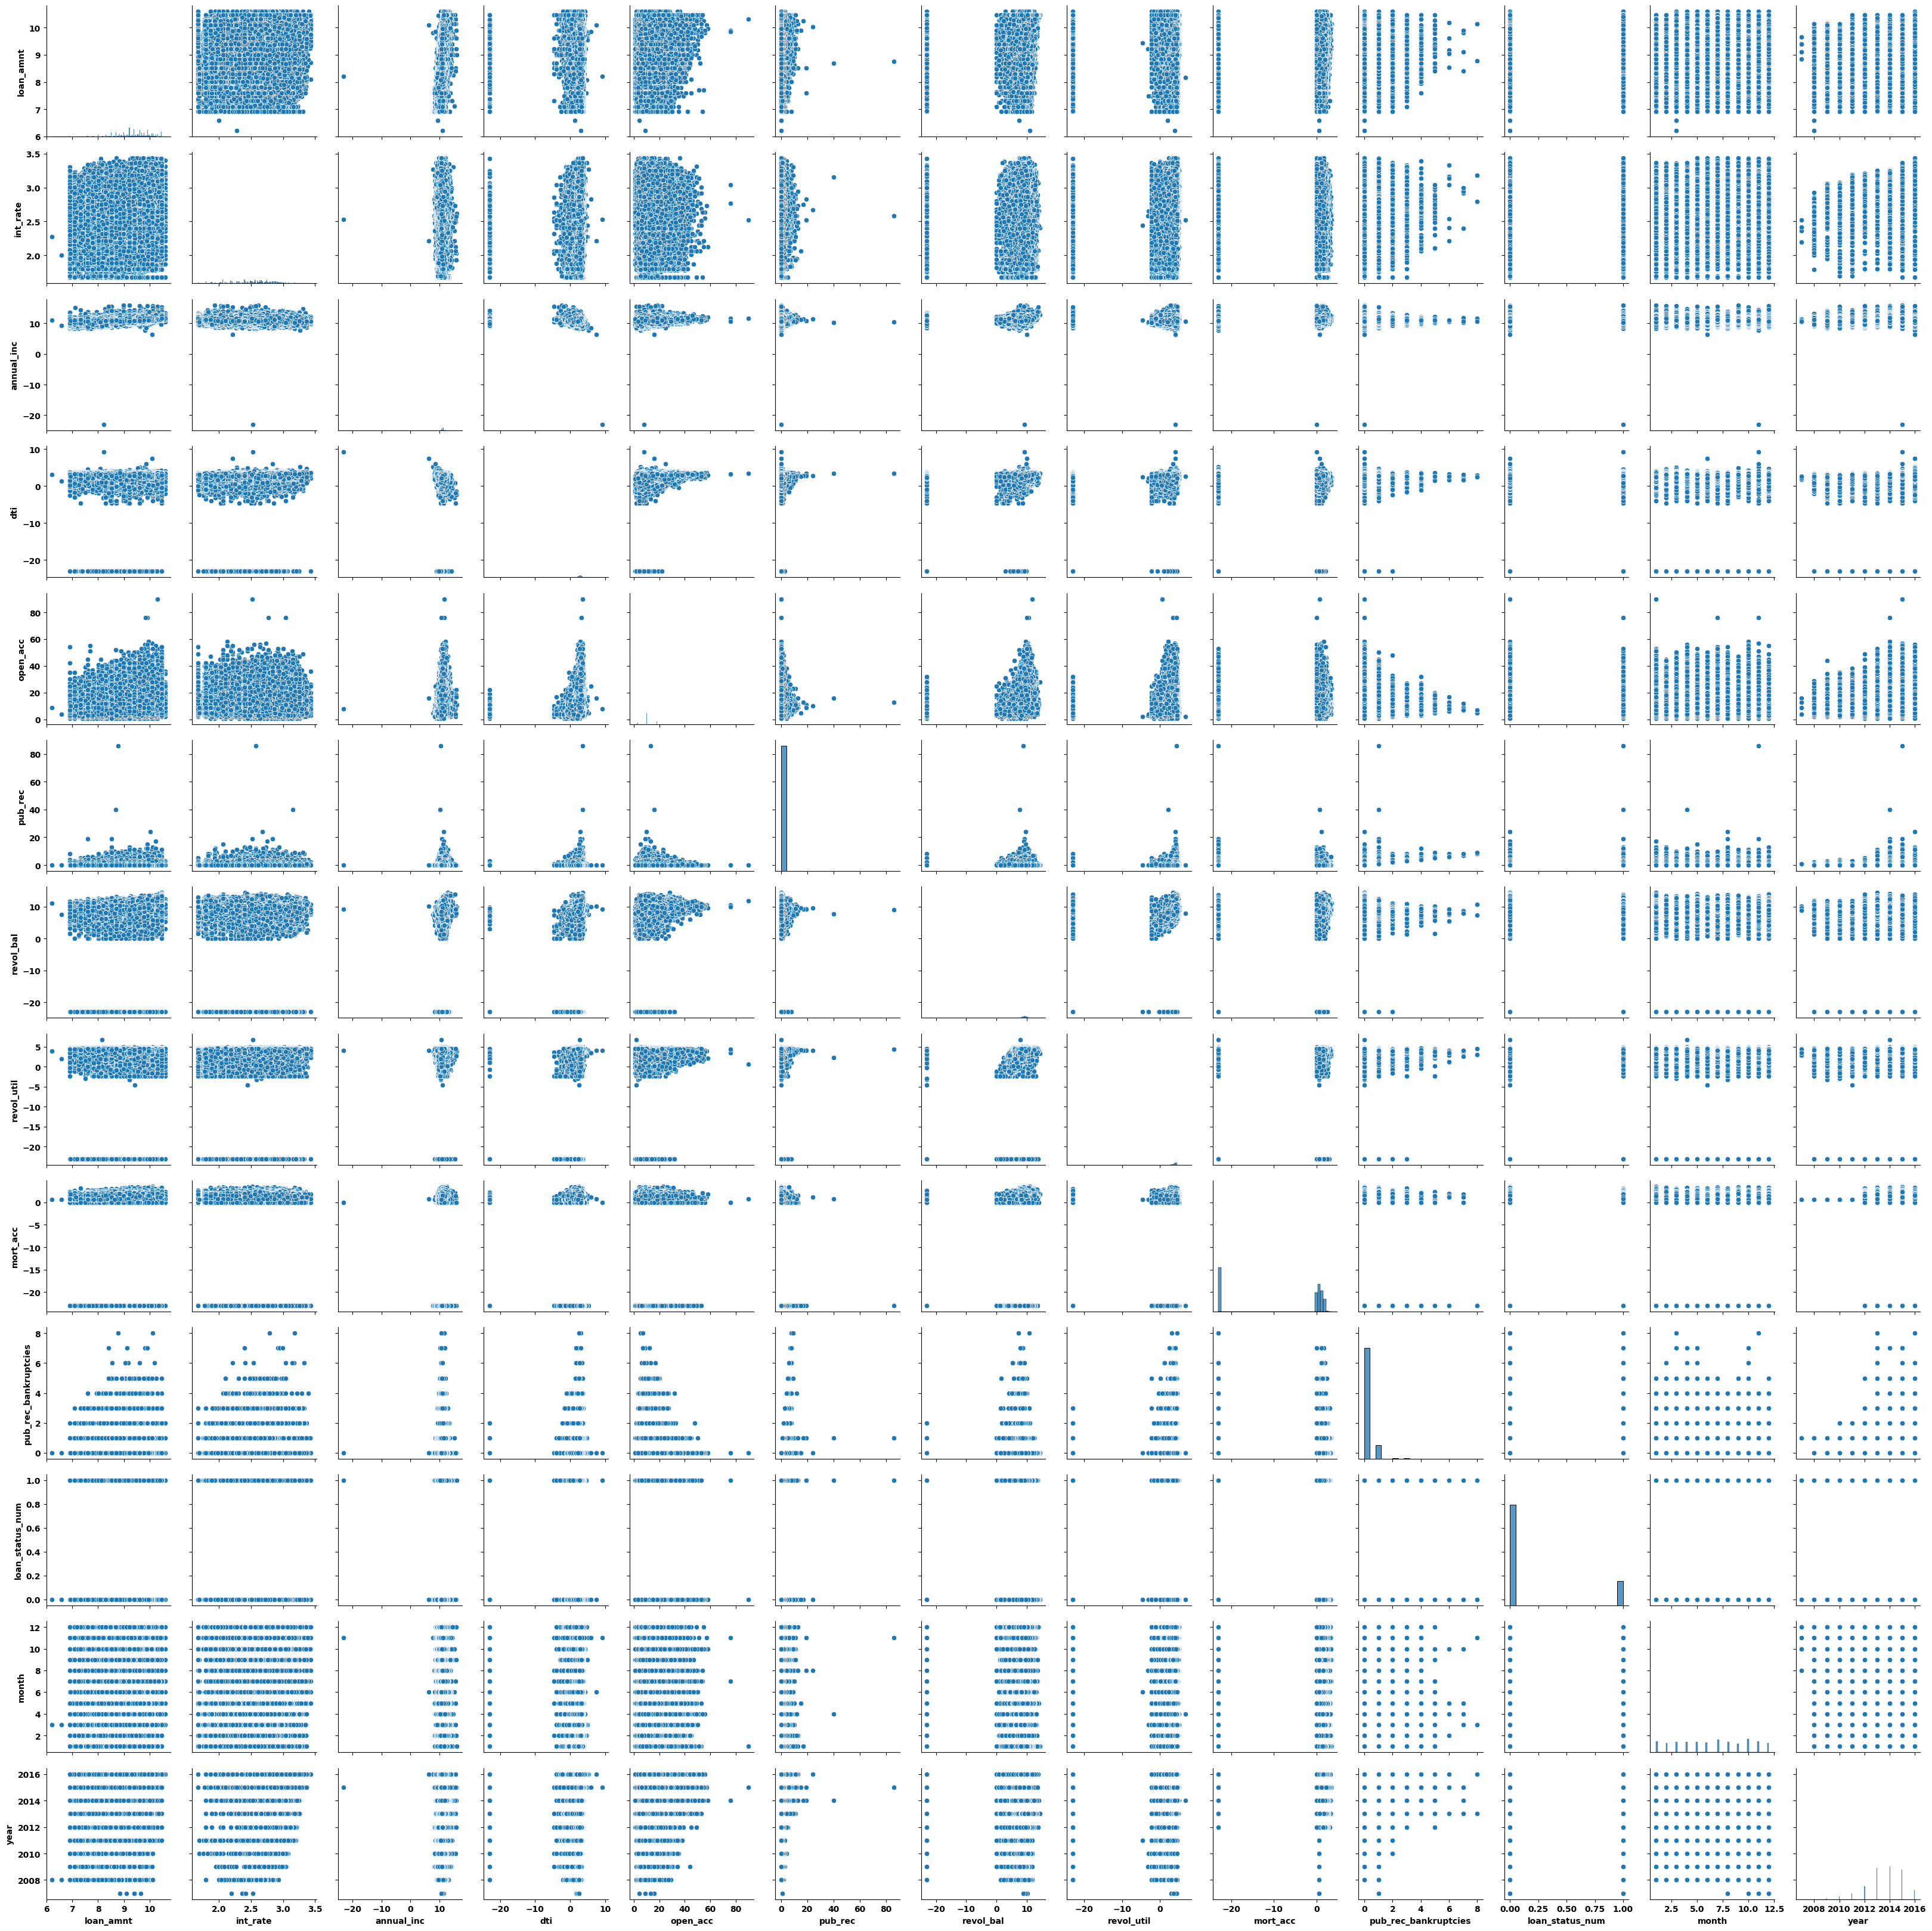

In [40]:
plt.figure(figsize=(20, 40))

# Create pairplot
sns.pairplot(numeric_df)
plt.tight_layout()
plt.show()

Most of the plots show a non-linear relationship or no relationship. It suggests that linear models may not be suitable for modeling these relationships. It may be necessary to explore non-linear modeling techniques or consider alternative features that could capture the underlying patterns more effectively. 

### Box Plots of Numerical Features grouped by Loan Status

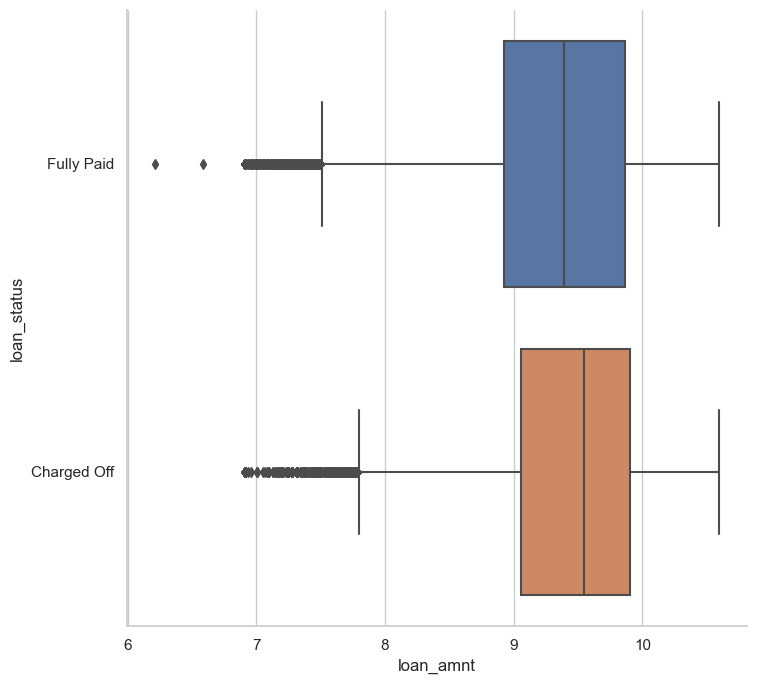

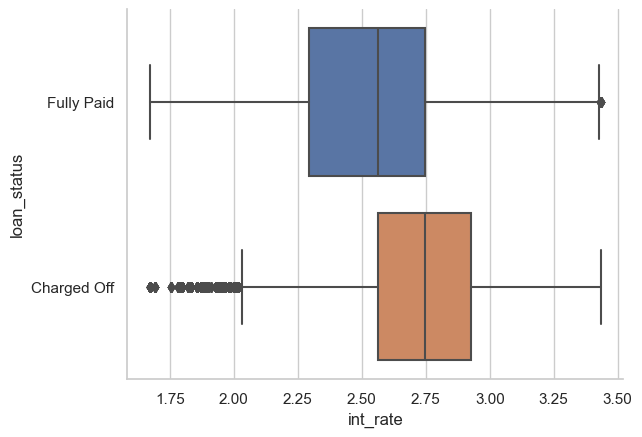

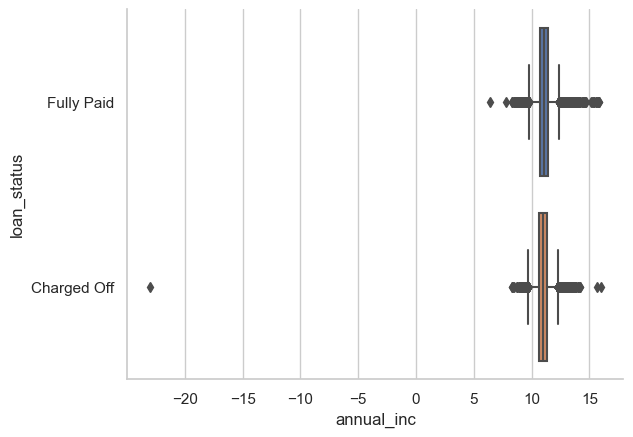

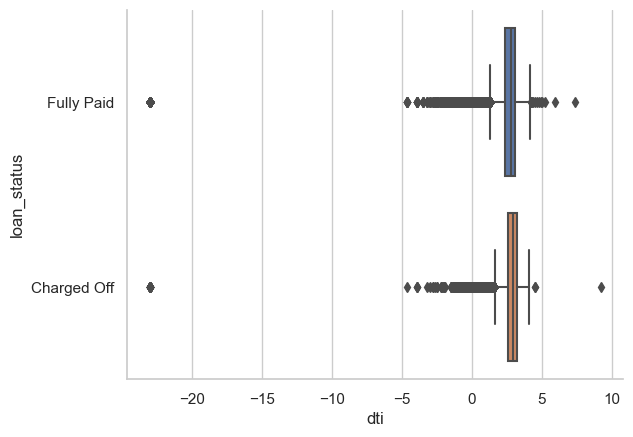

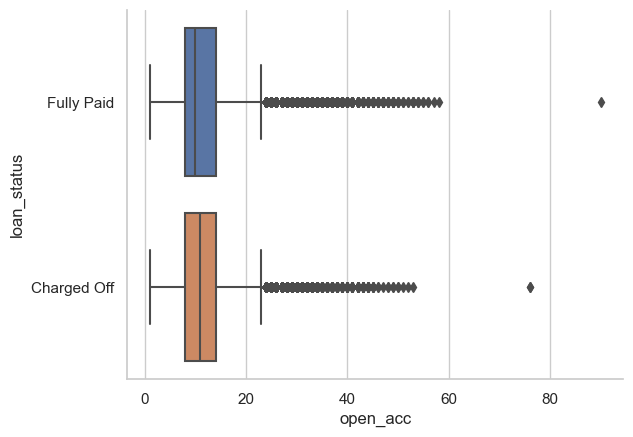

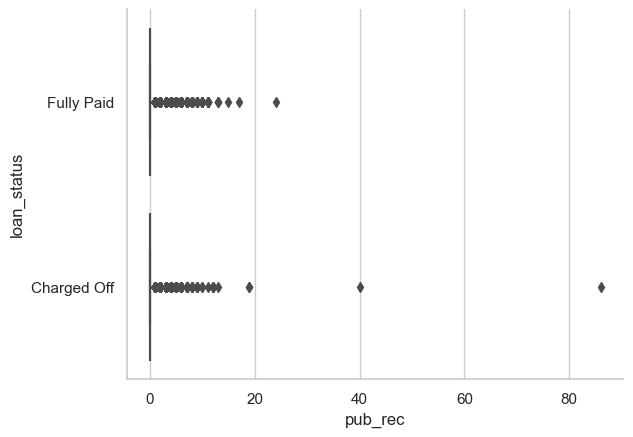

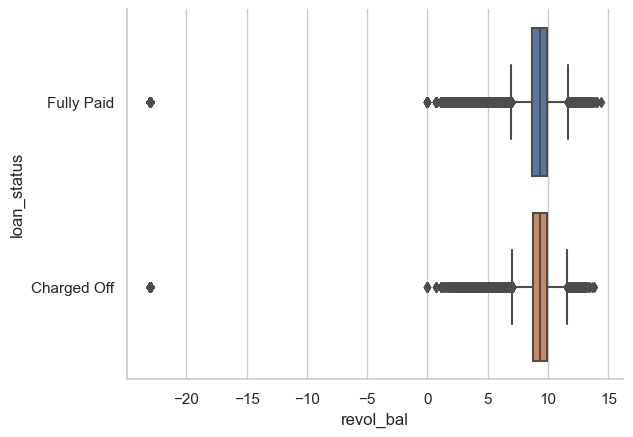

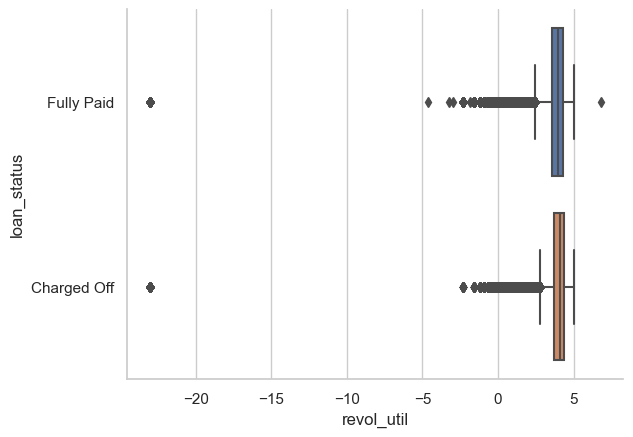

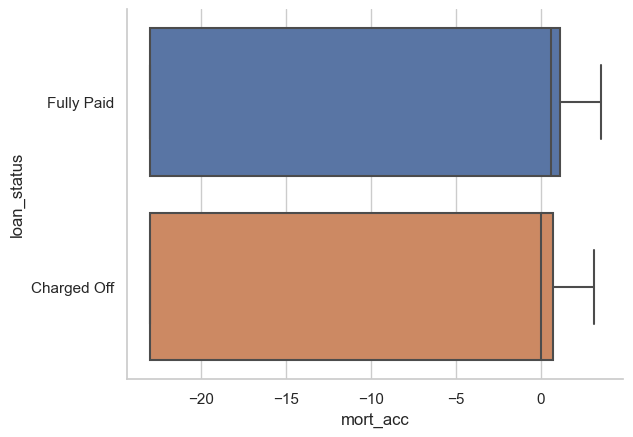

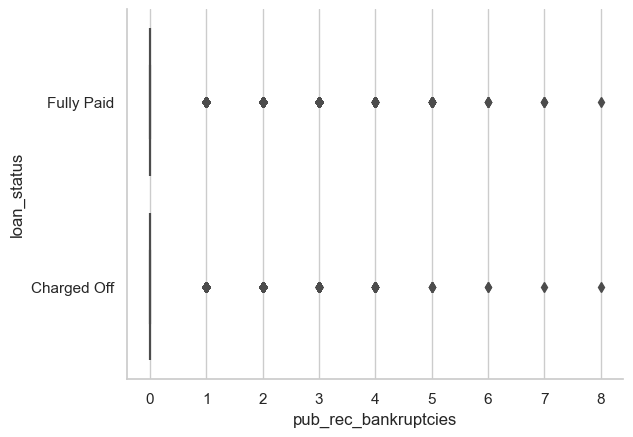

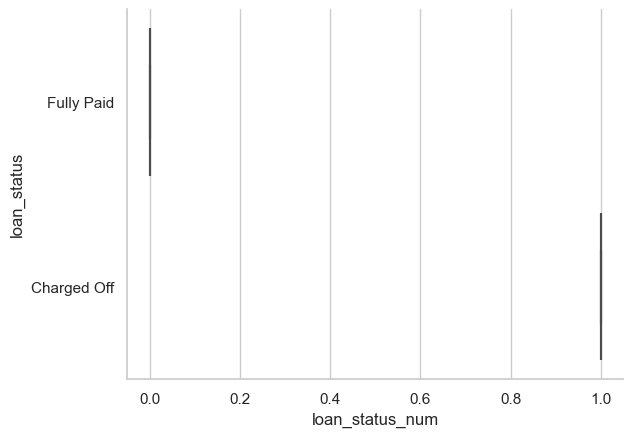

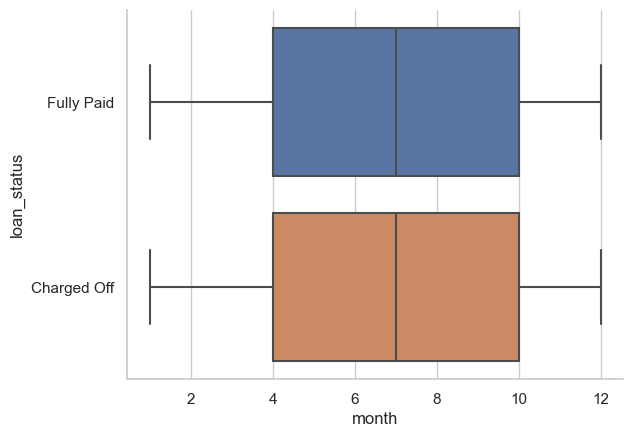

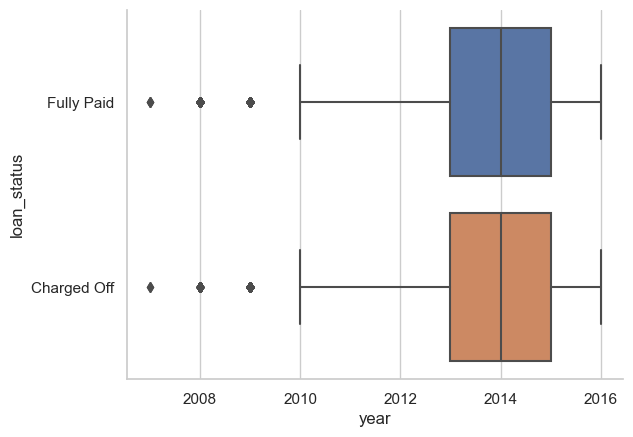

In [41]:
# Set the aesthetics for the plots (optional)
sns.set(style="whitegrid")

plt.figure(figsize = (8,8))

# Create a box plot for each numerical column in the DataFrame
for column in numeric_df.columns:
    sns.boxplot(data=raw_df, x=column, y="loan_status")
    sns.despine()
    plt.show()
    


* `loan_amount`,`open_acc`, `annual_inc`,`pub_rec`,`recol_bal`,`revol_util`,`mort_acc`,`month`,`year` seem to have little effect on `loan_status` variable and are not a strong differentiator in predicting loan status.
* `loan_status` of 'Charged_off' has higher interest rate range than 'Fully Paid'


**Loan Status by Categorical Feature Analysis**

<Figure size 1500x400 with 0 Axes>

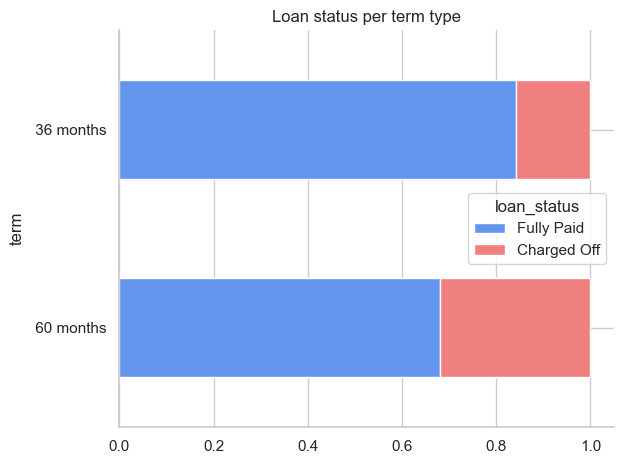

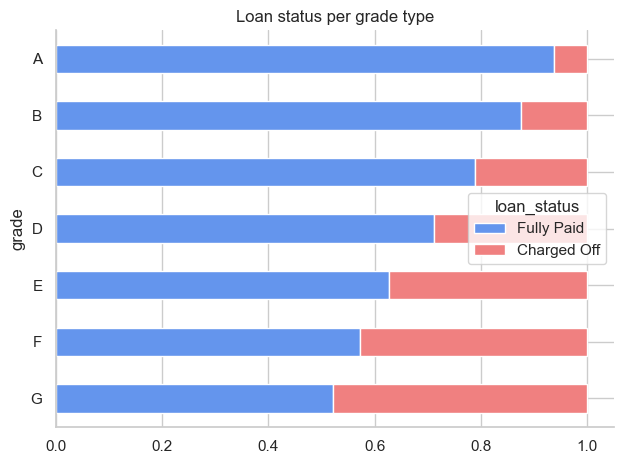

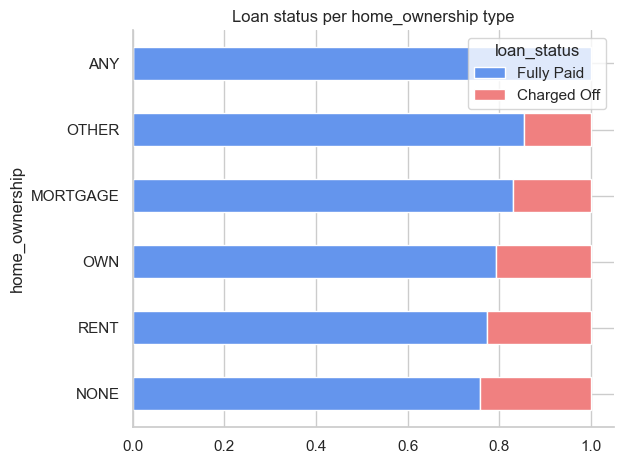

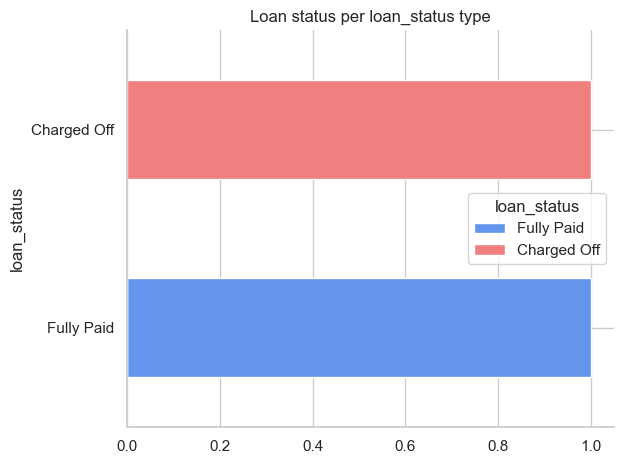

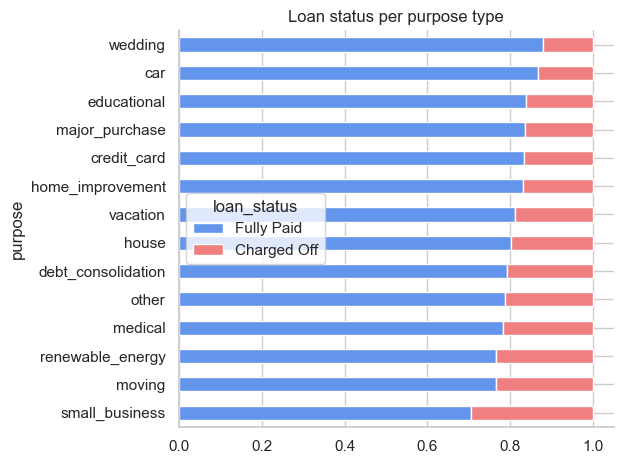

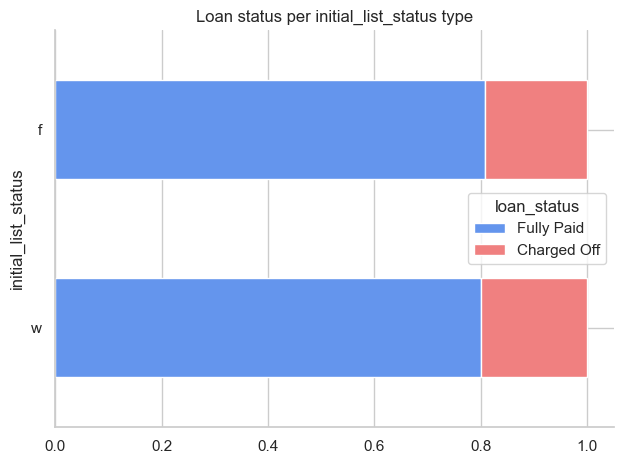

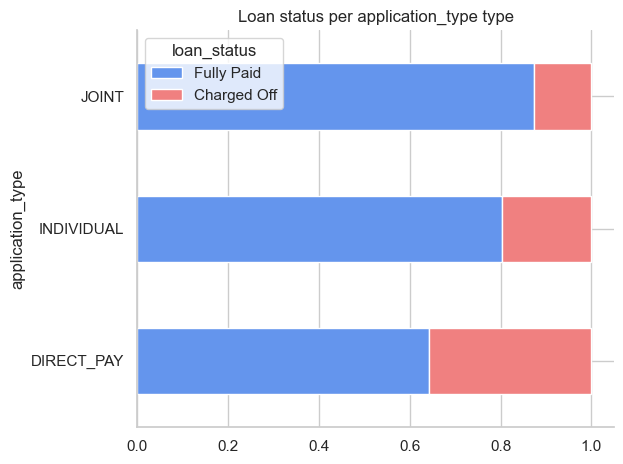

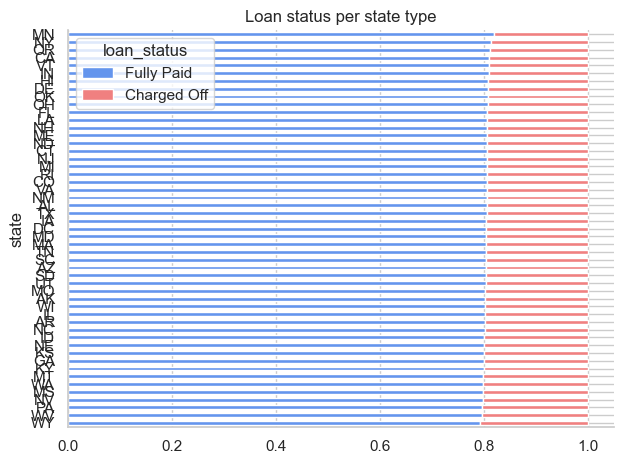

In [42]:
plt.figure(figsize = (15,4))

for column in raw_df.select_dtypes("object").columns:
    rate_data = raw_df.groupby([column, "loan_status"])["loan_status"].count() / raw_df.groupby(column)["loan_status"].count()

    rate_data.unstack()[["Fully Paid", "Charged Off"]].sort_values("Fully Paid").plot(kind="barh", stacked=True, color=["cornflowerblue", "lightcoral"])
    plt.title(f"Loan status per {column} type")
    plt.tight_layout()
    sns.despine()
    plt.show()

**Analysis of Loan Status by each State**

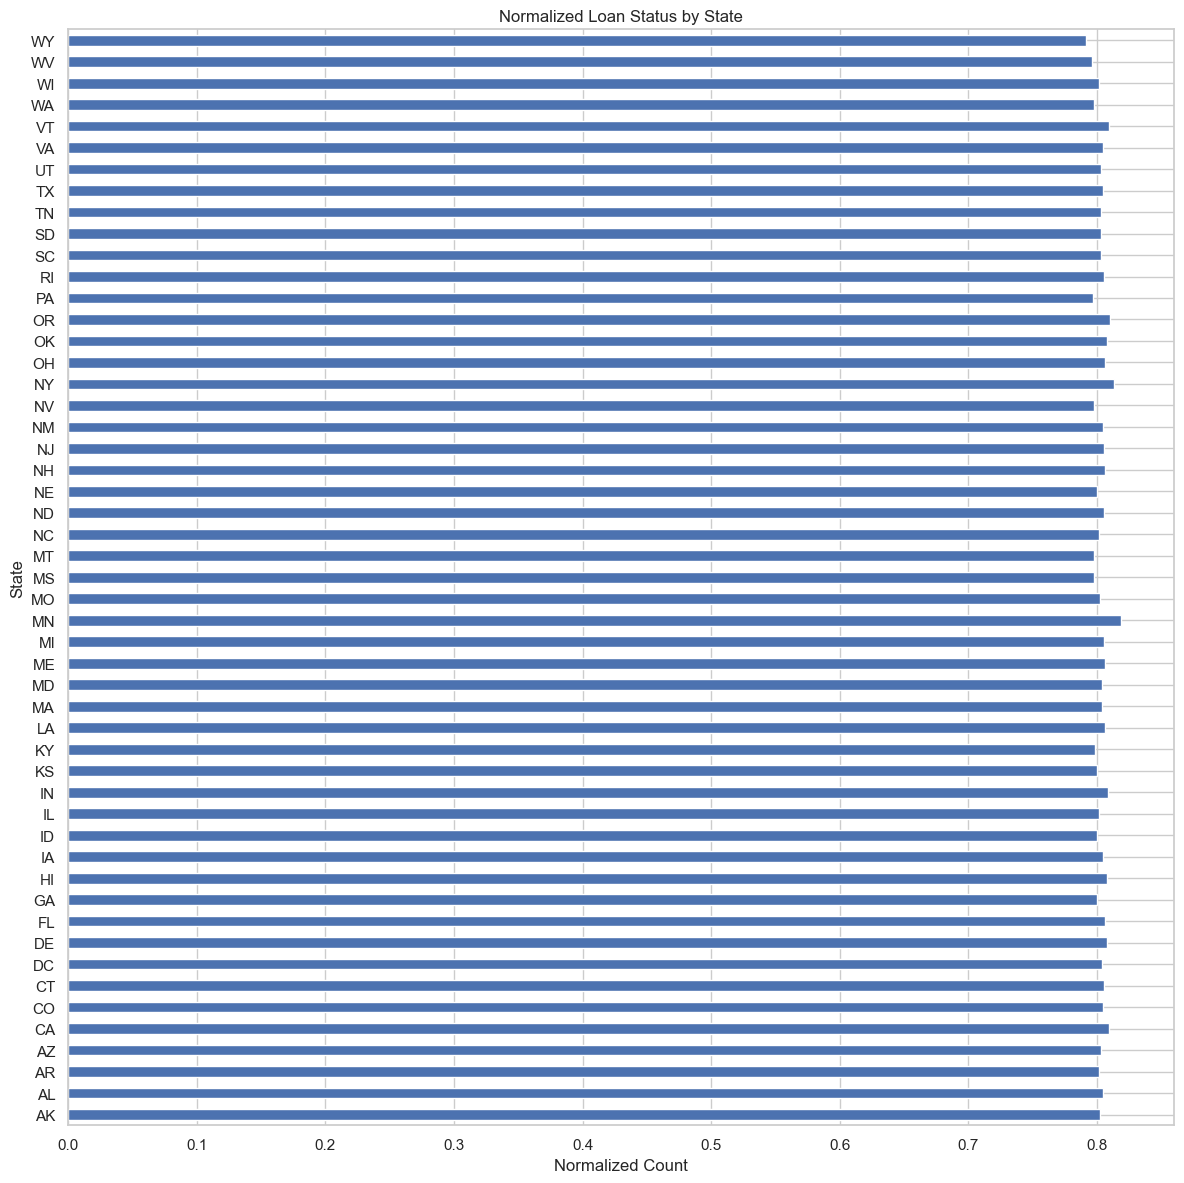

In [43]:
# Group the data by state and loan status, then count the occurrences
grouped_data = raw_df.groupby(['state', 'loan_status']).size().unstack()

# Calculate the total count for each state
state_totals = grouped_data.sum(axis=1)

# Normalize the data by dividing the count of each loan status by the total count for each state
normalized_data = grouped_data.div(state_totals, axis=0)

# Plotting
plt.figure(figsize=(12, 12))

normalized_data['Fully Paid'].plot(kind='barh')  

plt.title('Normalized Loan Status by State')
plt.xlabel('Normalized Count')  # Update the label to indicate it's normalized
plt.ylabel('State')

plt.tight_layout()
plt.show()

There appears to be very little difference between status in terms of loans given out. This is unusual as we would expect the larger states to have higher loan share.

**Analysis of Distributions for Numeric Features Excluding Outliers**

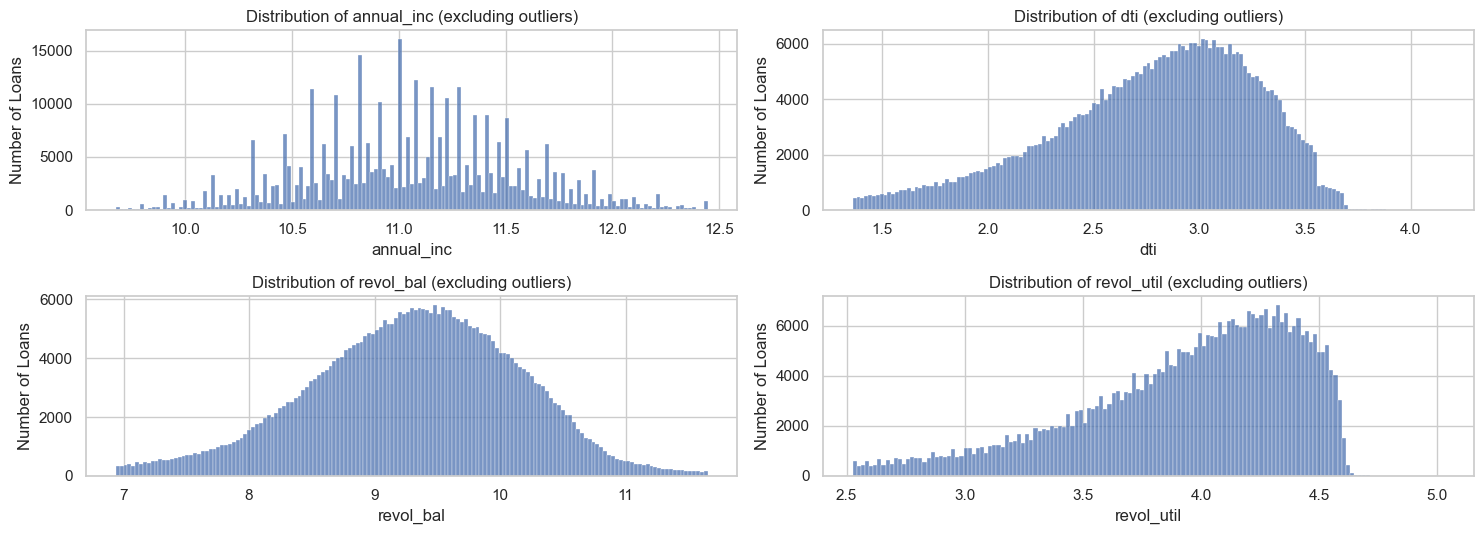

In [44]:
cols_with_outliers = ['annual_inc', 'dti', 'revol_bal', 'revol_util']

plt.subplots(2,2, figsize=(15,5.5))
plot_num = 1

for col in cols_with_outliers:
    q1 = raw_df[col].quantile(0.25)
    q3 = raw_df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = raw_df[(raw_df[col] >= lower_bound) & (raw_df[col] <= upper_bound)]

    plt.subplot(2, 2, plot_num)  # Adjust the subplot grid as needed
    
    sns.histplot(filtered_data[col])
    plt.title(f"Distribution of {col} (excluding outliers)")
    plt.xlabel(col)
    plt.ylabel("Number of Loans")

    plot_num += 1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Analysis of Normalized Categorical Feature Distributions**

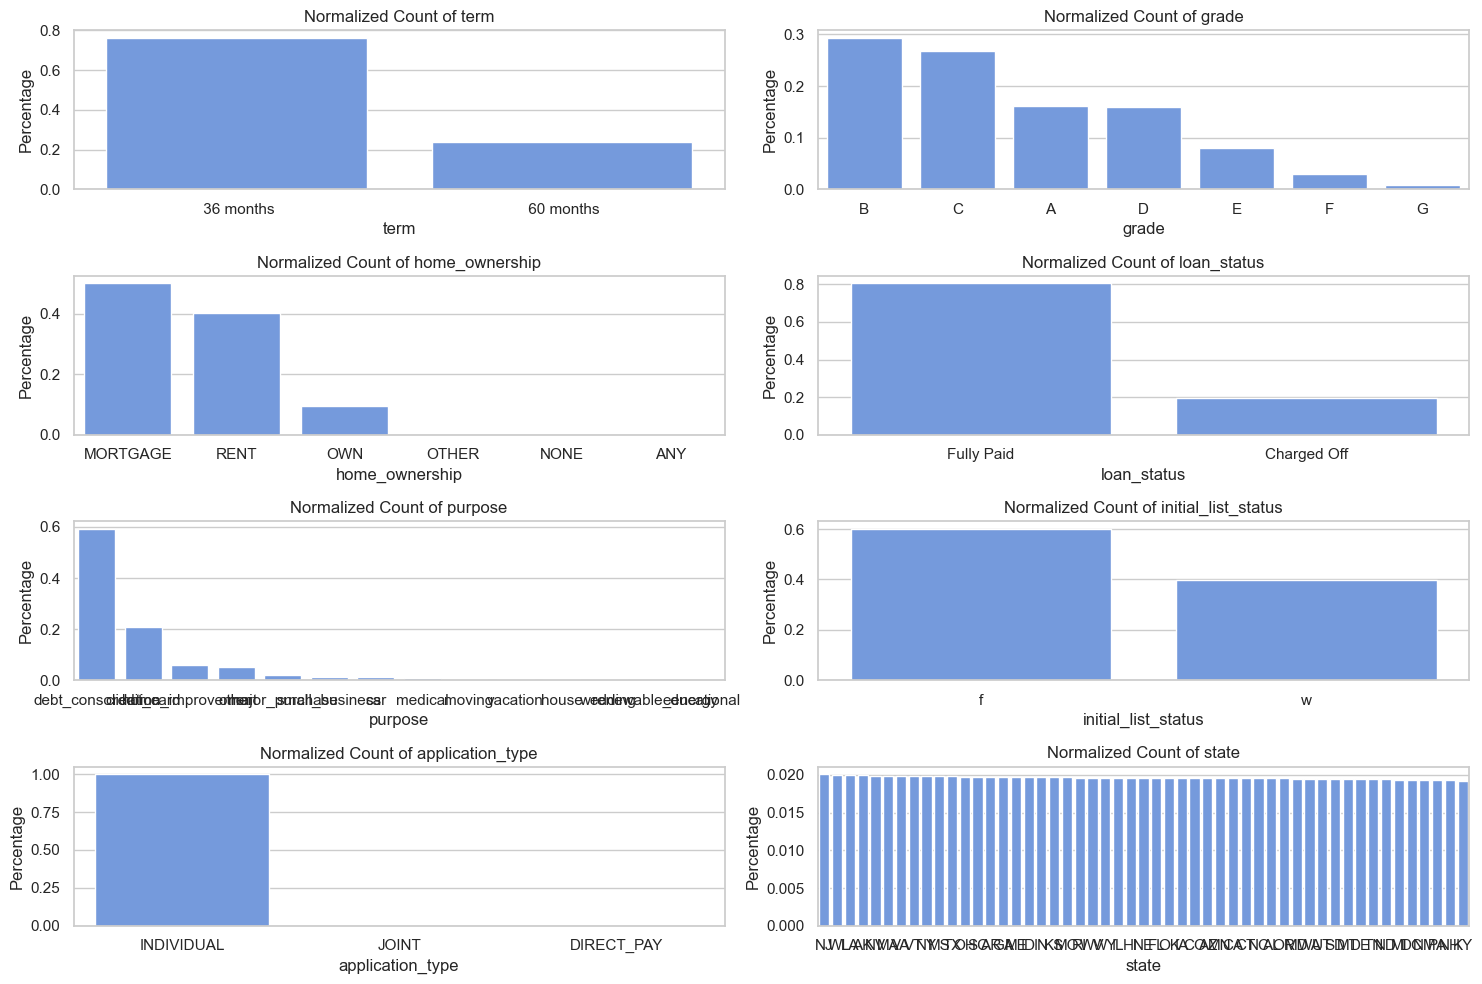

In [45]:
categorical_df = raw_df.select_dtypes("object")

plot_num = 1

plt.subplots(4, 2, figsize=(15, 10))

for col in categorical_df.columns:
    plt.subplot(4, 2, plot_num)
    
    # Calculate normalized counts manually
    counts = raw_df[col].value_counts(normalize=True)
    
    # Plot the bar chart with a single color (e.g., 'cornflowerblue')
    sns.barplot(x=counts.index, y=counts.values, color='cornflowerblue')
    
    plt.title(f"Normalized Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plot_num += 1

plt.tight_layout()
plt.show()

* 75% of loans have 3 years tenor and remaining have 5 year tenor.
* Grades B and C have the highest loans, followed by A and D.
* Most of the loans have have home ownership listed as mortgage, followed by rent.
* 80% of loans are under 'Fully paid' category and remaining 20% are under 'Charged Off' category.
* Two many categories in purpose.
* Most of the applications have individual category.

1. Maximum loans are in the range of 5k to 12.5k USD.
2. Minimum loans are extended in range of 27k to 32k USD.


Most loans are in the range of 11% to 16%. The loans above 21% taper off.

**Analysis of Loan Term Rates by Loan Grade**

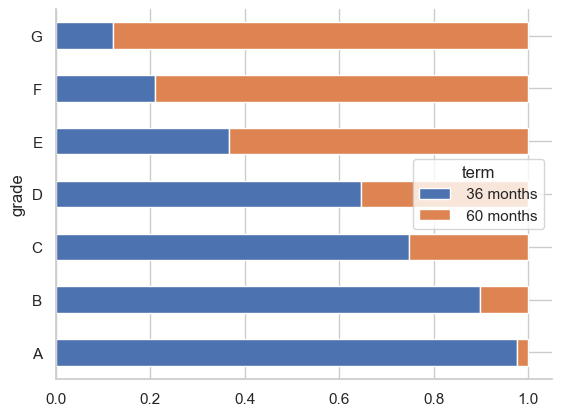

In [46]:
rates = raw_df.groupby(["grade", "term"])["term"].count()/raw_df.groupby(["grade"])["term"].count()
rates.unstack().plot(kind="barh", stacked=True)
sns.despine()

**Correlation Heatmap of Numeric Features**

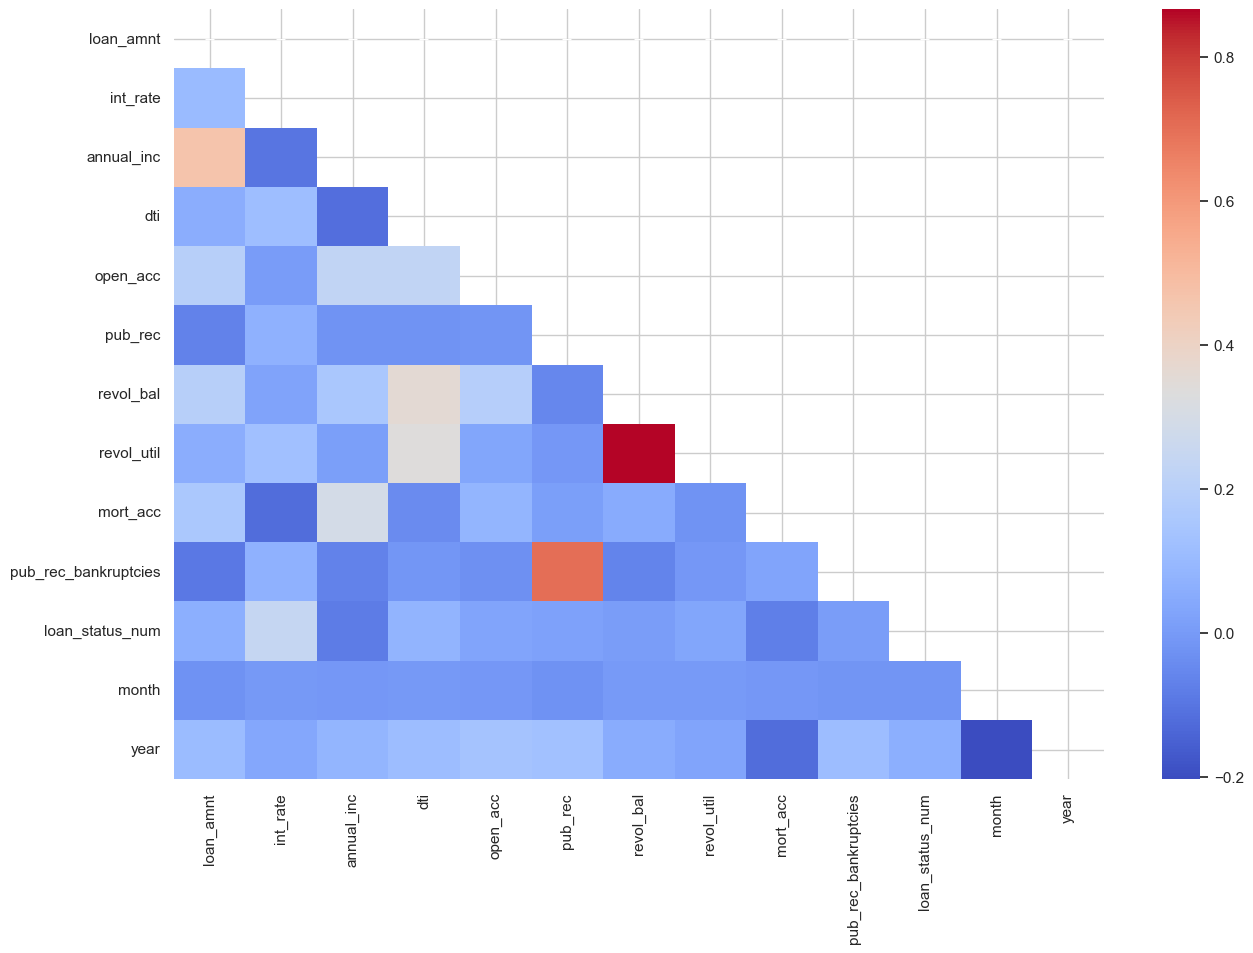

In [47]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(raw_df.corr(), dtype=bool))

# Set up the figure with size
plt.figure(figsize=(15, 10))

# Draw the heatmap with the mask
sns.heatmap(data = raw_df.corr(), cmap="coolwarm", annot=True, mask=mask)

plt.show()


* Only `revol_bal` and `revol_util` show high correlation.

In [48]:
raw_df['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (loan_status)

**Exclusion of target variable 'loan_status' Column from Dataframes**

In [49]:
raw_df = raw_df.drop(columns = ['loan_status'])
categorical_df = categorical_df.drop(columns = ['loan_status'])

* We have removed the 'loan_status' column from the raw dataframe.
* Similarly, the 'loan_status' column has been excluded from the categorical dataframe.
* This step is taken to separate the target variable from the predictor variables for further analysis and modeling.
* The 'loan_status' column is typically the target variable we aim to predict, and it is removed to prevent data leakage during modeling.
* The dataframes are now ready for feature selection, preprocessing, and modeling without the 'loan_status' column.

In [50]:
# Removing the 'purpose' and 'state' column from the raw_df dataframe

raw_df = raw_df.drop(columns = ['purpose'])
raw_df = raw_df.drop(columns = ['state'])

Based on the EDA, these columns have been removed. Purpose has too many categories and state has not predictive power

In [51]:
# Removing the 'purpose' and 'state' column from the categorical_df dataframe
categorical_df = categorical_df.drop(columns = ['purpose'])

In [52]:
categorical_df = categorical_df.drop(columns = ['state'])

* In this section, we perform feature engineering and one-hot encoding of categorical variables to prepare the data for modeling. 

**One-Hot Encoding of Categorical Variables**

In [53]:
dummies_df = pd.get_dummies(categorical_df, drop_first=True)

# Now, concatenate the numerical columns with the original dataframe

processed_df = pd.concat([raw_df, dummies_df], axis=1)

# Drop the original categorical columns if needed
processed_df = processed_df.drop(categorical_df.columns, axis=1)

# Now, processed_df contains the original numerical columns and the one-hot encoded categorical columns

* First, we create a new DataFrame called 'dummies_df' by one-hot encoding the categorical variables from 'categorical_df'. 
* 'drop_first=True' parameter is used to drop the first category for each variable to avoid multicollinearity.
* Next, we concatenate the one-hot encoded categorical columns with the original numerical columns from 'raw_df' to create the 'processed_df' DataFrame.
* We drop the original categorical columns from 'processed_df' to eliminate redundancy, ensuring that only the one-hot encoded columns remain.

In [54]:
# Check the columns after encoding in processed_df
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    395219 non-null  float64
 1   int_rate                     395219 non-null  float64
 2   annual_inc                   395219 non-null  float64
 3   dti                          395219 non-null  float64
 4   open_acc                     395219 non-null  float64
 5   pub_rec                      395219 non-null  float64
 6   revol_bal                    395219 non-null  float64
 7   revol_util                   395219 non-null  float64
 8   mort_acc                     395219 non-null  float64
 9   pub_rec_bankruptcies         395219 non-null  float64
 10  loan_status_num              395219 non-null  int64  
 11  month                        395219 non-null  int64  
 12  year                         395219 non-null  int64  
 13 

In [55]:
processed_df.shape

(395219, 28)

**Heatmap for all columns of processed_df**

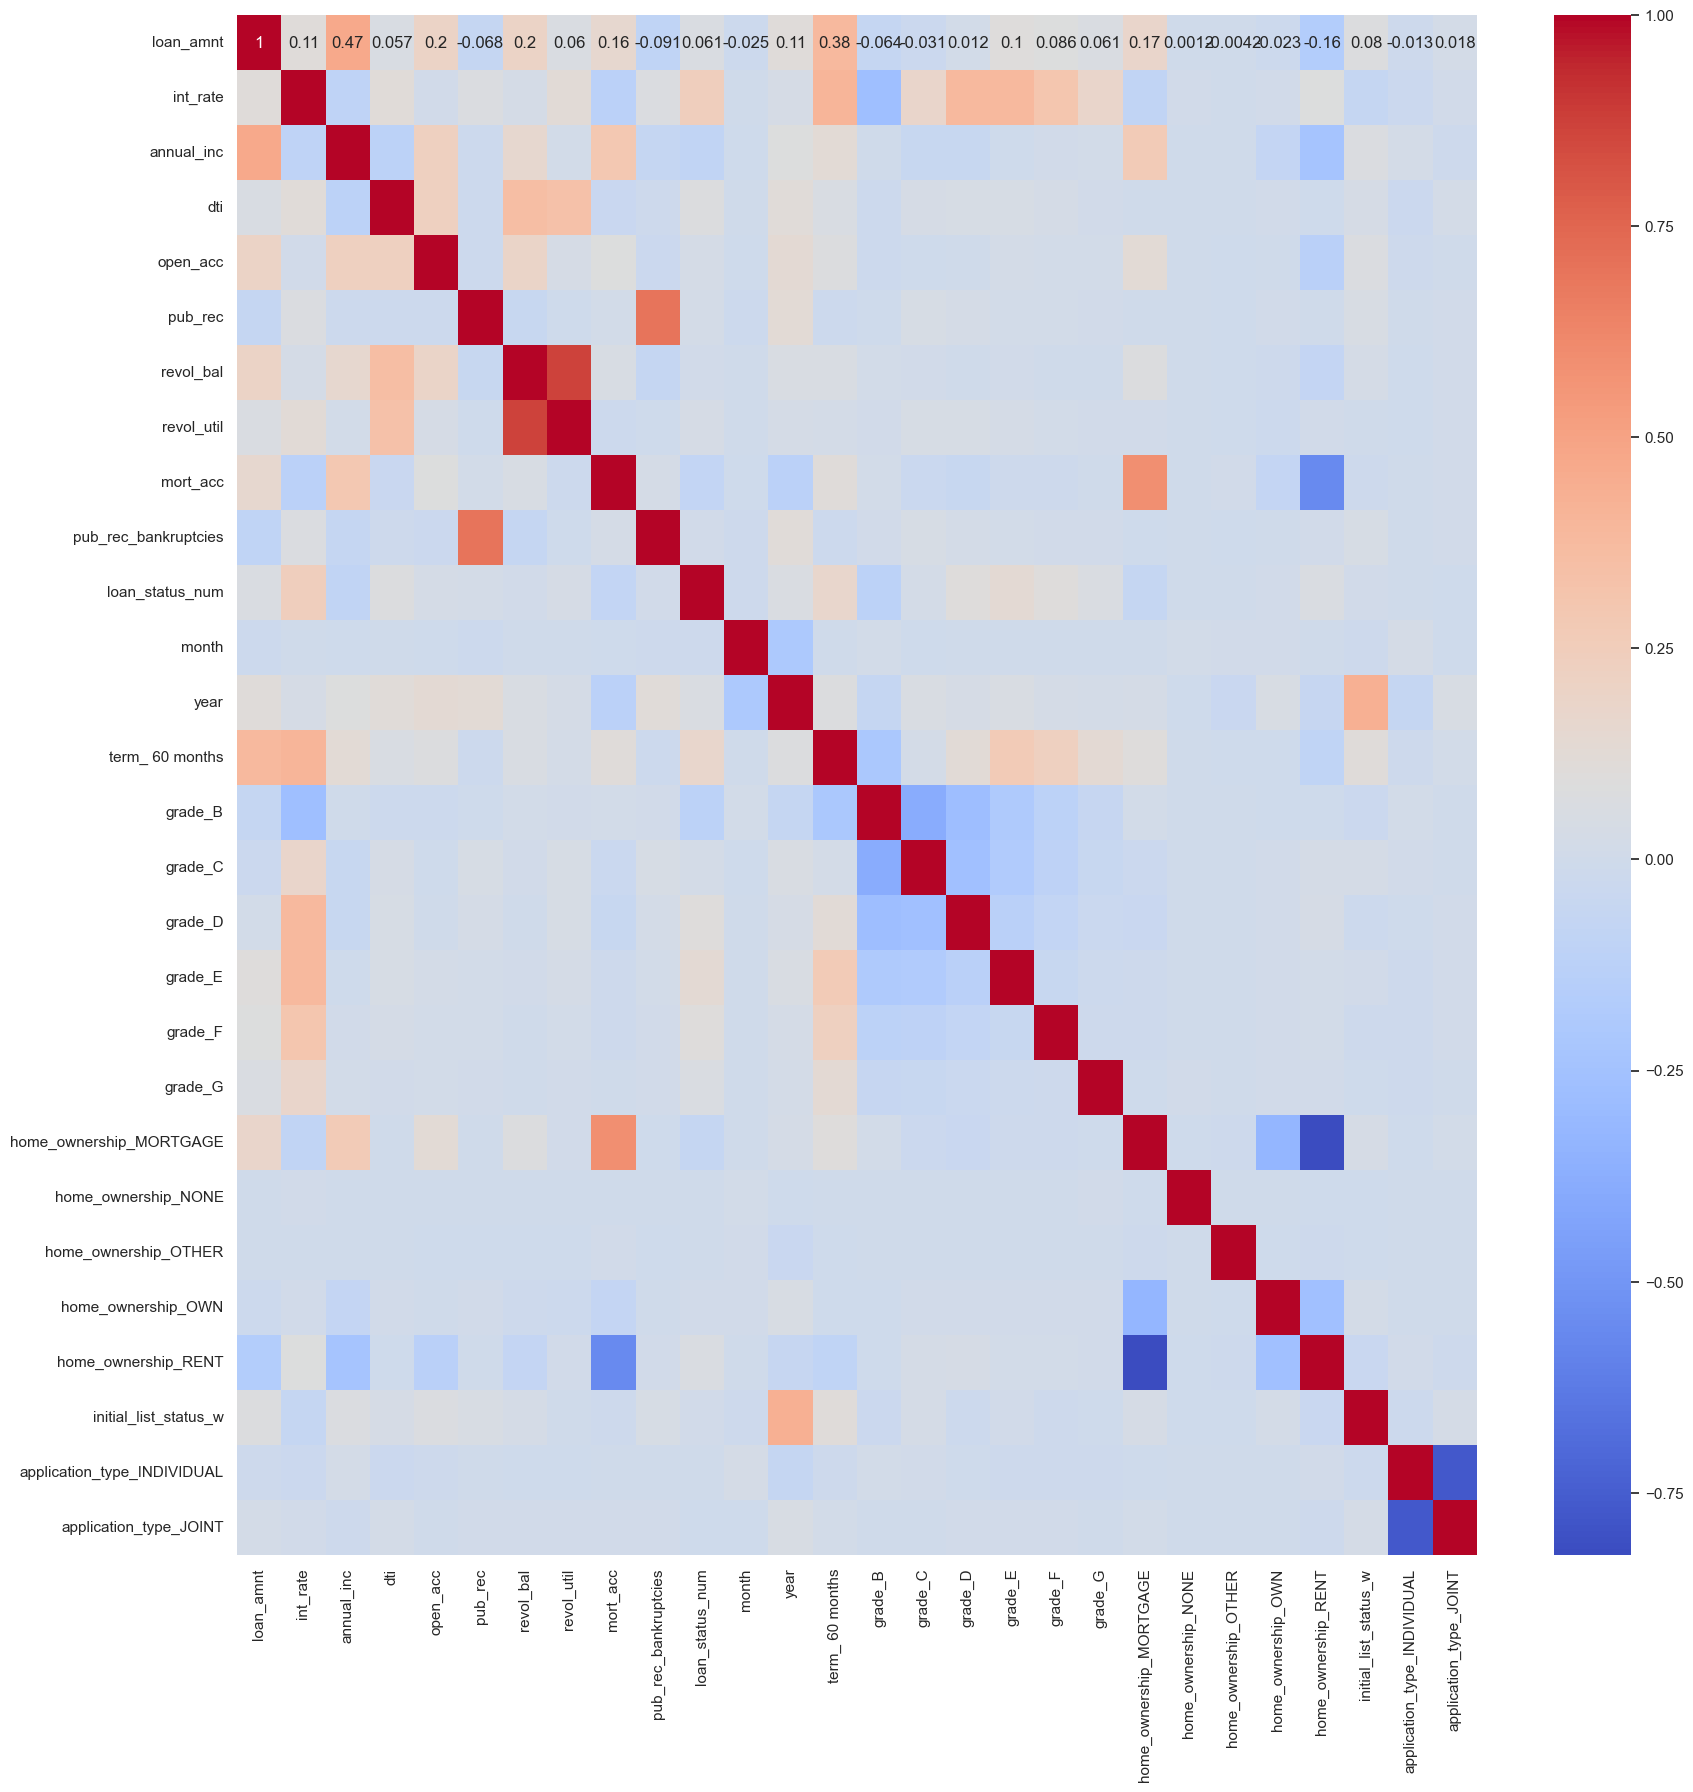

In [56]:
# Set up the figure with size
plt.figure(figsize = (20,20))

# Draw the heatmap with the mask
sns.heatmap(data = processed_df.corr(), cmap="coolwarm", annot=True)

plt.show()

## Train-Test Split

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features (X) and target variable (y)
X = processed_df.drop('loan_status_num', axis=1)  #  'loan_status' is target variable
y = processed_df['loan_status_num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=49)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform all columns in training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform all columns in testing set
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [129]:
X_test_scaled.head()

loan_amnt  int_rate  annual_inc       dti  open_acc   pub_rec  revol_bal  \
0  -0.214295 -1.997097    0.843603  0.187064 -0.646579 -0.333519   0.474884   
1  -1.891173  0.048283   -1.145295  0.298800 -0.451792 -0.333519  -0.649844   
2  -0.677447  1.156666   -0.818015  0.453921 -1.036155  1.533927  -0.896802   
3  -1.121121  0.591209   -0.799885  0.371961 -0.062216 -0.333519  -0.017559   
4  -0.005415 -0.340482   -0.989494  1.077568 -0.646579 -0.333519   0.120751   

   revol_util  mort_acc  pub_rec_bankruptcies     month      year  \
0    0.263235  0.822709             -0.342142 -1.620804  0.928860   
1    0.180302 -1.350916             -0.342142 -0.453211 -1.118603   
2   -0.090063  0.665779             -0.342142  0.422483  0.928860   
3    0.367897 -1.350916             -0.342142  0.130585 -1.118603   
4    0.308294  0.665779             -0.342142 -0.453211  1.611348   

   term_ 60 months   grade_B   grade_C   grade_D   grade_E   grade_F  \
0        -0.558821 -0.644032 -0.604698 -0.436804 -0.294431 -0.174735   
1        -0.558821  1.552718 -0.604698 -0.436804 -0.294431 -0.174735   
2        -0.558821 -0.644032 -0.604698 -0.436804  3.396379 -0.174735   
3        -0.558821 -0.644032  1.653717 -0.436804 -0.294431 -0.174735   
4        -0.558821  1.552718 -0.604698 -0.436804 -0.294431 -0.174735   

    grade_G  home_ownership_MORTGAGE  home_ownership_NONE  \
0 -0.088043                 0.997758            -0.008275   
1 -0.088043                -1.002247            -0.008275   
2 -0.088043                -1.002247            -0.008275   
3 -0.088043                -1.002247            -0.008275   
4 -0.088043                 0.997758            -0.008275   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0             -0.016187           -0.324309            -0.822244   
1             -0.016187           -0.324309             1.216184   
2             -0.016187           -0.324309             1.216184   
3             -0.016187           -0.324309             1.216184   
4             -0.016187           -0.324309            -0.822244   

   initial_list_status_w  application_type_INDIVIDUAL  application_type_JOINT  
0               1.226215                     0.042546               -0.033116  
1              -0.815518                     0.042546               -0.033116  
2              -0.815518                     0.042546               -0.033116  
3              -0.815518                     0.042546               -0.033116  
4               1.226215                   -23.503969               30.197178

In [151]:
processed_df.head()

loan_amnt  int_rate  annual_inc       dti  open_acc  pub_rec  revol_bal  \
0   9.210340  2.437116   11.669929  3.267285      16.0      0.0  10.501472   
1   8.987197  2.484073   11.082143  3.093313      17.0      0.0   9.910016   
2   9.655026  2.350422   10.670280  2.548664      13.0      0.0   9.391578   
3   8.881836  1.870263   10.896739  0.955511       6.0      0.0   8.607399   
4  10.101313  2.848971   10.915088  3.524889      13.0      0.0  10.109851   

   revol_util      mort_acc  pub_rec_bankruptcies  loan_status_num  month  \
0    3.732896 -2.302585e+01                   0.0                0      1   
1    3.975936  1.098612e+00                   0.0                0      1   
2    4.523960 -2.302585e+01                   0.0                0      1   
3    3.068053 -2.302585e+01                   0.0                0     11   
4    4.245634  1.000000e-10                   0.0                1      4   

   year  term_ 60 months  grade_B  grade_C  grade_D  grade_E  grade_F  \
0  2015                0        1        0        0        0        0   
1  2015                0        1        0        0        0        0   
2  2015                0        1        0        0        0        0   
3  2014                0        0        0        0        0        0   
4  2013                1        0        1        0        0        0   

   grade_G  home_ownership_MORTGAGE  home_ownership_NONE  \
0        0                        0                    0   
1        0                        1                    0   
2        0                        0                    0   
3        0                        0                    0   
4        0                        1                    0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    0   
2                     0                   0                    1   
3                     0                   0                    1   
4                     0                   0                    0   

   initial_list_status_w  application_type_INDIVIDUAL  application_type_JOINT  
0                      1                            1                       0  
1                      0                            1                       0  
2                      0                            1                       0  
3                      0                            1                       0  
4                      0                            1                       0

In [130]:
type(X_test)

pandas.core.frame.DataFrame

In [156]:
input_df = pd.DataFrame([[10000,8.2,80000,2,10,0,10000,4000,1,0,1,2015,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0]], columns = X_test.columns)
#print(input_df)



input_df['loan_amnt'] = np.log(input_df['loan_amnt'] + small_const)
input_df['annual_inc'] = np.log(input_df['annual_inc']+ small_const)
input_df['int_rate'] = np.log(input_df['int_rate']+ small_const)
input_df['dti'] = np.log(input_df['dti']+ small_const)
input_df['revol_bal'] = np.log(input_df['revol_bal']+ small_const)
input_df['revol_util'] = np.log(input_df['revol_util']+ small_const)
input_df['mort_acc'] = np.log(input_df['mort_acc']+ small_const)

scaled_array = scaler.transform(input_df)
print(scaled_array)

scaled_df    = pd.DataFrame(scaled_array, columns = X_test.columns)  
#print(scaled_df.head())
                 

[[-2.14295141e-01 -1.31675613e+00  4.20855128e-01 -2.13729031e+00
  -2.57003694e-01 -3.33519366e-01  5.21540666e-02  2.18064793e+00
   6.65779197e-01 -3.42141728e-01 -1.62080427e+00  9.28859861e-01
   1.78948222e+00  1.55271804e+00 -6.04698366e-01 -4.36804208e-01
  -2.94431181e-01 -1.74734848e-01 -8.80429776e-02 -1.00224700e+00
   1.20850788e+02 -1.61871337e-02 -3.24308860e-01 -8.22243758e-01
   1.22621505e+00  4.25460052e-02 -3.31156771e-02]]


* Imported necessary modules from scikit-learn for data preprocessing, including train-test splitting and feature scaling.
* We selected the features (X) and the target variable (y) from the 'processed_df', where 'loan_status_num' is the numerical representation of the 'loan_status' column.
* The dataset is split into training and testing sets, with a test size of 15% and a specified random seed for reproducibility.
* We initialize a StandardScaler to standardize (scale) the numerical features.
* The scaler is fitted and transformed on the training set to ensure that it learns the scaling parameters.
* The same scaling parameters are then used to transform the testing set, maintaining consistency.
* Finally, the scaled arrays are converted back into DataFrames for further analysis and modeling.

In [58]:
X_train_scaled.shape

(335936, 27)

* The training dataset after feature scaling 'X_train_scaled,' consists of 335,936 rows. 
* Each row is represented by 27 scaled features.

In [59]:
processed_df[processed_df['loan_status_num'] == 1].shape[0]/processed_df[['loan_status_num']].shape[0]

0.19615200686201828

19.62% of the loans in the dataset had a 'Charged off' status, while the remainder has 'Fully Repaid' value

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize Logistic Regression model
model = LogisticRegression(random_state=449)

# Fit the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.8070

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     47698
           1       0.57      0.05      0.09     11585

    accuracy                           0.81     59283
   macro avg       0.69      0.52      0.49     59283
weighted avg       0.76      0.81      0.73     59283



### Logistic Regression 

Comments: 


Accuracy: 0.8073


In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the SMOTE class with desired sampling strategy (50:50 balance)
sampling_strategy = 1.0  # Adjust this to achieve a 50:50 balance
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


# Initialize Logistic Regression model
model = LogisticRegression(random_state=449)

# Fit the model on the resampled training set
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report_str)

Accuracy: 0.6428

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.74     47698
           1       0.31      0.66      0.42     11585

    accuracy                           0.64     59283
   macro avg       0.60      0.65      0.58     59283
weighted avg       0.77      0.64      0.68     59283



findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


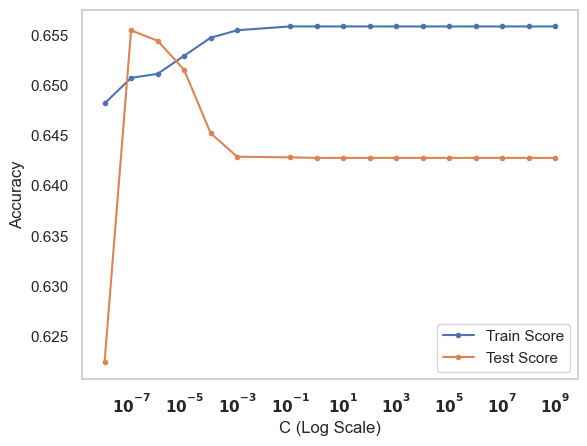

In [62]:
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
                   1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])


# Lists to store training and testing scores
train_scores = []
test_scores = []

# Iterate over different values of C
for C_value in C_range:
    # Initialize Logistic Regression model with the current C value
    model = LogisticRegression(C=C_value, random_state=1)

    # Fit the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

     # Make predictions on the training set
    y_train_pred = model.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = model.predict(X_test_scaled)

    # Append testing scores to the respective list
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(C_range, train_scores, label='Train Score', marker='.')
plt.plot(C_range, test_scores, label='Test Score', marker='.')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.grid()
plt.legend()
plt.show()

In [63]:
# y' is output variable
class_counts = np.bincount(y_train_resampled)
class_0_count = class_counts[0]  # Count of class 0
class_1_count = class_counts[1]  # Count of class 1

print(f"Percentage of Class 0 : {class_0_count * 100 /(class_0_count+class_1_count)}")
print(f"Percentage of Class 1 : {class_1_count * 100 /(class_0_count+class_1_count)}")

Percentage of Class 0 : 50.0
Percentage of Class 1 : 50.0


## Decision Trees

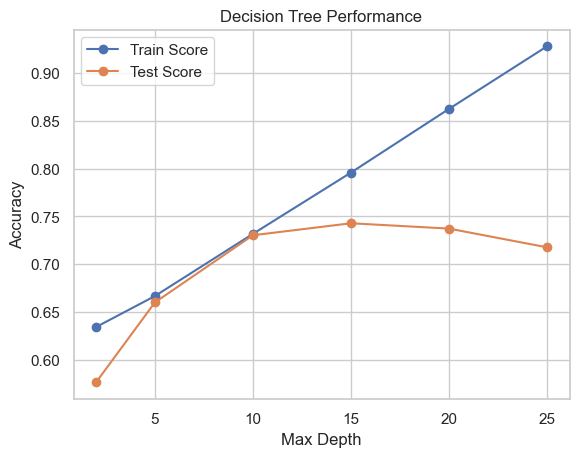

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Range of values for max_depth
max_depth_range = [2, 5, 10, 15, 20, 25, None]

# Iterate over different values of max_depth
for depth in max_depth_range:
    # Initialize Decision Tree Classifier with the current max_depth value
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fit the model on the training set
    dt_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = dt_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = dt_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(max_depth_range, train_scores, label='Train Score', marker='o')
plt.plot(max_depth_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance')
plt.grid(True)
plt.legend()
plt.show()


<Axes: >

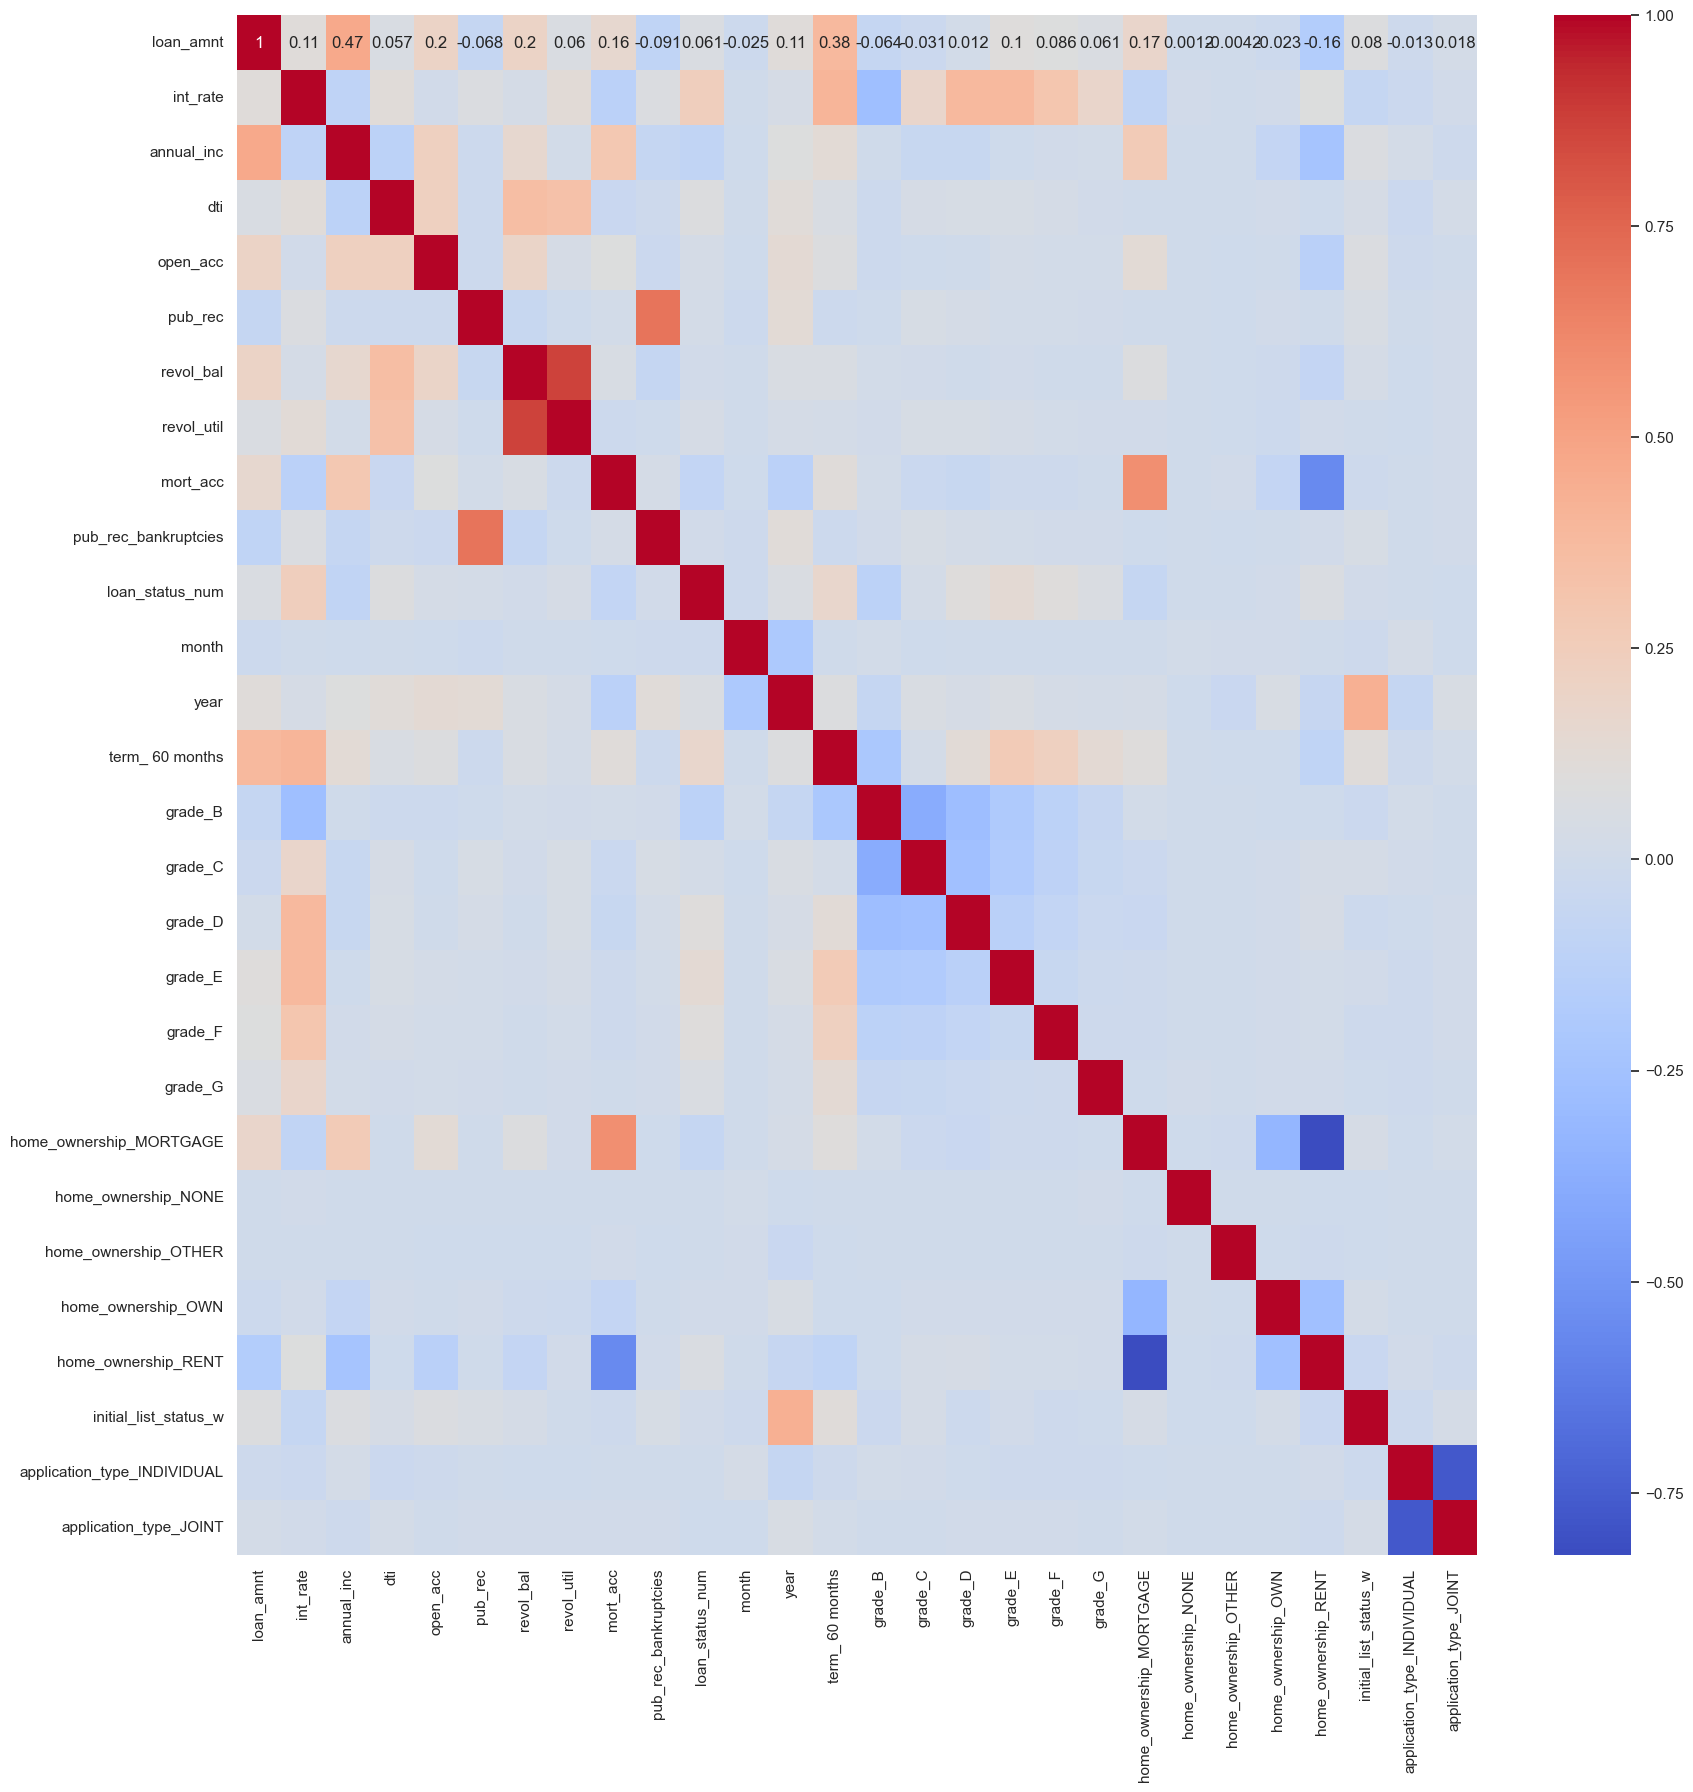

In [65]:
# Set up the figure with size
plt.figure(figsize = (20,20))

# Draw the heatmap with the mask
sns.heatmap(data = processed_df.corr(), cmap="coolwarm", annot=True)

# plt.show()


### XGBoost

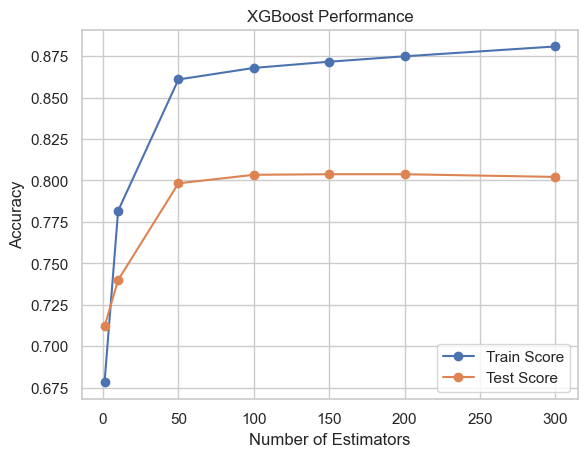

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []

# Range of values for n_estimators
n_estimators_range = [1, 10, 50, 100, 150,200,300]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize XGBoost Classifier with the current n_estimators value
    xgb_classifier = XGBClassifier(n_estimators=n_estimators, random_state=100)
    
    # Fit the model on the training set
    xgb_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = xgb_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = xgb_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Performance')
plt.grid(True)
plt.legend()
plt.show()

### Catboost

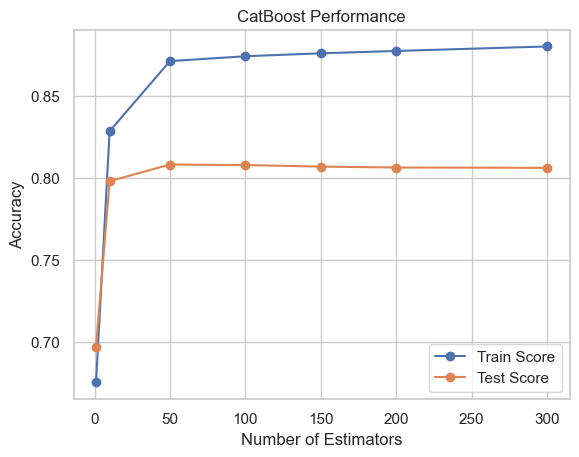

In [67]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

# Range of values for n_estimators
n_estimators_range = [1, 10, 50, 100, 150, 200, 300]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize CatBoost Classifier with the current n_estimators value
    cat_classifier = CatBoostClassifier(n_estimators=n_estimators, random_state=100, verbose=0)
    
    # Fit the model on the training set
    cat_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = cat_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = cat_classifier.predict(X_test_scaled)
    
    # Append training and testing scores to the respective lists
    train_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# Plotting results
plt.figure()
plt.plot(n_estimators_range, train_scores, label='Train Score', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('CatBoost Performance')
plt.grid(True)
plt.legend()
plt.show()

### Pipleline and GridSearchCV


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, recall_score

# Splitting data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Define a custom scorer for recall since you want to maximize it
recall_scorer = make_scorer(recall_score, pos_label=1)

# Models and their respective hyperparameters
models = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'param_grid': {'C': [0.01, 0.1, 1, 10, 50, 100]},
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(),
        'param_grid': {'n_estimators': [1, 10, 50, 100]},
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [2, 5, 10, 15, 20]},
    }
#    {
#        'name': 'Neural Network',
#        'model': MLPClassifier(),
#        'param_grid': {'hidden_layer_sizes': [(100,), (50, 50), (20, 10)],
#                       'alpha': [0.0001, 0.001, 0.01]}
#    }
]

# Loop through the models and perform hyperparameter tuning with GridSearchCV
best_models = []
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    # Create GridSearchCV object with 5-fold cross-validation and recall scoring
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring=recall_scorer, n_jobs=-1)
    
    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)

    # Find the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_recall = grid_search.best_score_

    print(f"Best {model_name} Hyperparameters: {best_params}")
    print(f"Best {model_name} Recall Score: {best_recall}")

    # Store the best model for later evaluation
    best_models.append((model_name, best_model))

# You can now evaluate the best models on the validation set or test set

Best Logistic Regression Hyperparameters: {'C': 10}
Best Logistic Regression Recall Score: 0.6712901770301571
Best XGBoost Hyperparameters: {'n_estimators': 50}
Best XGBoost Recall Score: 0.7778349101415666
Best Decision Tree Hyperparameters: {'max_depth': 20}
Best Decision Tree Recall Score: 0.7605407558556602


In [70]:
print(best_models)

[('Logistic Regression', LogisticRegression(C=10)), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('Decision Tree', DecisionTreeClassifier(max_depth=20))]


In [71]:
best_models

[('Logistic Regression', LogisticRegression(C=10)),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=50, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)),
 ('Decision Tree', DecisionTreeClassifier(max_depth=20))]

## Advanced Modeling with Recall Score


### Recall Scores with best models from GridSearchCV

In [72]:
from sklearn.metrics import recall_score

# Create a list to store the recall scores for each model
recall_scores = []

# Loop through the best models
for model_name, best_model in best_models:
    # Fit the best model on the entire training dataset
    best_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate the recall score on the test set
    recall = recall_score(y_test, y_pred)
    
    # Append the recall score to the list
    recall_scores.append((model_name, recall))

# Sort the models by their recall scores in descending order
recall_scores.sort(key=lambda x: x[1], reverse=True)

# Print the best model and its recall score on the test set
best_model_name, best_recall = recall_scores[0]
print(f"Best Model: {best_model_name}")
print(f"Recall Score on Test Set: {best_recall}")

Best Model: Logistic Regression
Recall Score on Test Set: 0.6625809236081139


In [73]:
recall_scores

[('Logistic Regression', 0.6625809236081139),
 ('Decision Tree', 0.34147604661199826),
 ('XGBoost', 0.22183858437634874)]

In [74]:
from sklearn.metrics import recall_score

# Create a list to store the recall scores for the minority class for each model
minority_recall_scores = []

# Loop through the best models
for model_name, best_model in best_models:
    # Fit the best model on the entire training dataset
    best_model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate the recall score for the minority class on the test set
    minority_recall = recall_score(y_test, y_pred, pos_label=1)
    
    # Append the minority recall score to the list
    minority_recall_scores.append((model_name, minority_recall))

# Sort the models by their minority recall scores in descending order
minority_recall_scores.sort(key=lambda x: x[1], reverse=True)

# Print the best model and its minority recall score on the test set
best_model_name, best_minority_recall = minority_recall_scores[0]
print(f"Best Model for Minority Recall: {best_model_name}")
print(f"Minority Recall Score on Test Set: {best_minority_recall}")

Best Model for Minority Recall: Logistic Regression
Minority Recall Score on Test Set: 0.6625809236081139


In [75]:
minority_recall_scores

[('Logistic Regression', 0.6625809236081139),
 ('Decision Tree', 0.3406128614587829),
 ('XGBoost', 0.22183858437634874)]

### XGBoost

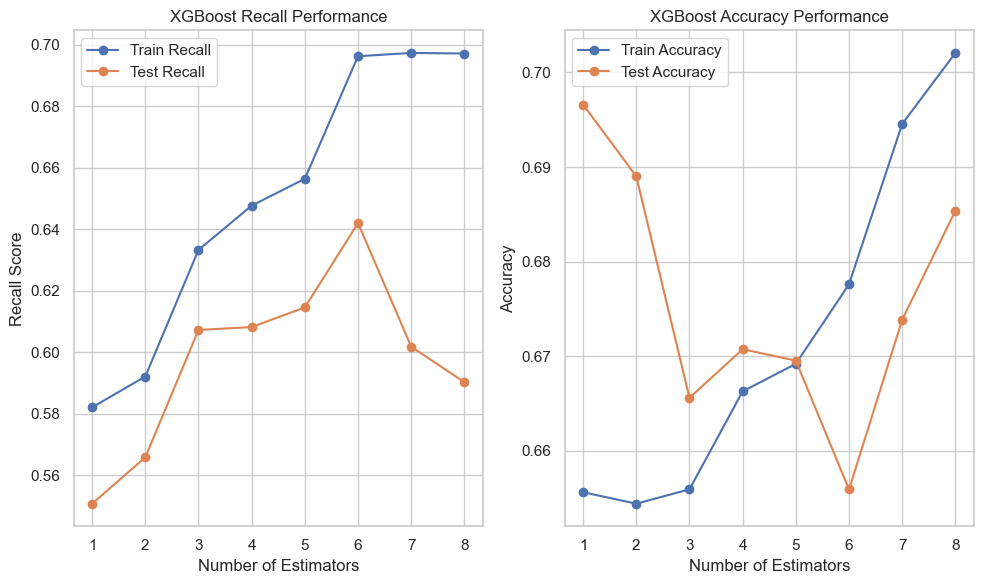

In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize empty lists to store scores
train_recall_scores = []
test_recall_scores = []
train_accuracy_scores = []
test_accuracy_scores = []

# Range of values for n_estimators
n_estimators_range = [1,2,3,4,5,6,7,8]


# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize XGBoost Classifier with the current n_estimators value
    xgb_classifier = XGBClassifier(n_estimators=n_estimators, max_depth = 3, min_child_weight = 20, gamma = 5, subsample = 0.7, reg_lambda = 10, reg_alpha =4  ,random_state=1)
    
    # Fit the model on the training set
    xgb_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = xgb_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = xgb_classifier.predict(X_test_scaled)
    
    # Calculate and append training and testing recall scores
    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)
    
    # Calculate and append training and testing accuracy scores
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot Recall Scores
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, train_recall_scores, label='Train Recall', marker='o')
plt.plot(n_estimators_range, test_recall_scores, label='Test Recall', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Recall Score')
plt.title('XGBoost Recall Performance')
plt.grid(True)
plt.legend()

# Plot Accuracy Scores
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy Performance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### CatBoost

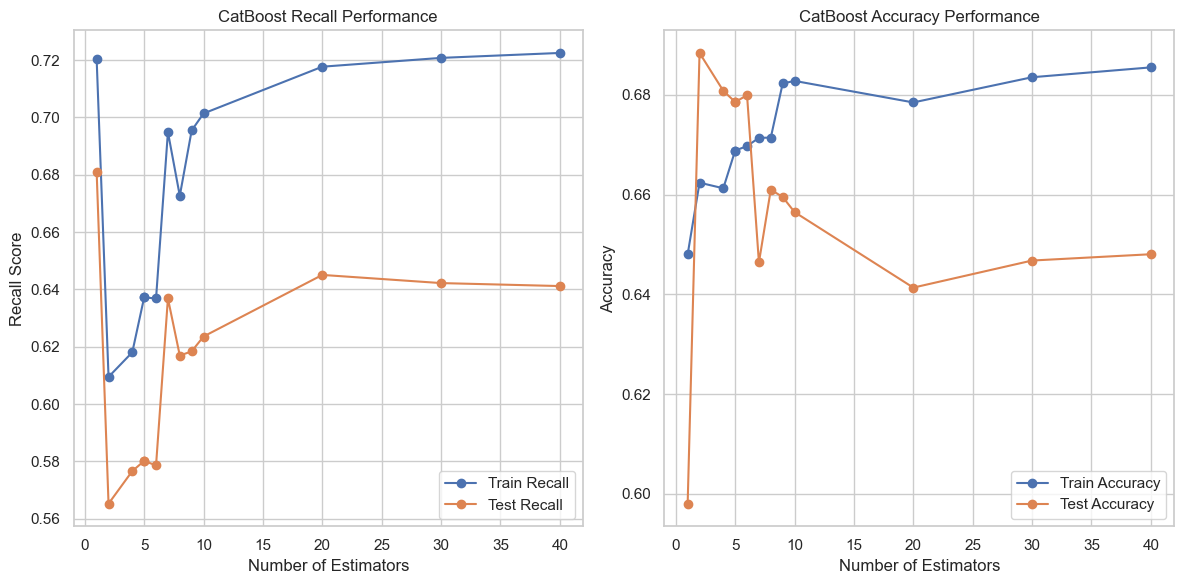

In [77]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize empty lists to store scores
train_recall_scores = []
test_recall_scores = []
train_accuracy_scores = []
test_accuracy_scores = []

# Range of values for n_estimators
n_estimators_range = [1,2,4,5,5,6,7,8,9, 10,20,30,40]

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize CatBoost Classifier with the current n_estimators value
    cat_classifier = CatBoostClassifier(n_estimators=n_estimators, depth = 4, l2_leaf_reg = 5.0, learning_rate= 0.01 , subsample= 0.7, early_stopping_rounds= 20,   random_state=100, verbose=0)
    
    # Fit the model on the training set
    cat_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = cat_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = cat_classifier.predict(X_test_scaled)
    
    # Calculate and append training and testing recall scores
    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)
    
    # Calculate and append training and testing accuracy scores
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plotting results
plt.figure(figsize=(12, 6))

# Plot Recall Scores
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, train_recall_scores, label='Train Recall', marker='o')
plt.plot(n_estimators_range, test_recall_scores, label='Test Recall', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Recall Score')
plt.title('CatBoost Recall Performance')
plt.grid(True)
plt.legend()

# Plot Accuracy Scores
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('CatBoost Accuracy Performance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
test_accuracy_scores

[0.5980297893156554,
 0.6884266990536916,
 0.6808359900814737,
 0.6785925138741292,
 0.6785925138741292,
 0.6799419732469679,
 0.6464079078319248,
 0.6609989373007439,
 0.6595482684749422,
 0.656511984886055,
 0.64136430342594,
 0.6467958774016159,
 0.6480609955636523]

In [79]:
test_recall_scores

[0.6808804488562796,
 0.5652136383254208,
 0.5766076823478636,
 0.5801467414760466,
 0.5801467414760466,
 0.5785930082002589,
 0.636858006042296,
 0.6169184290030212,
 0.6183858437634873,
 0.6235649546827795,
 0.645058264997842,
 0.6422097539922313,
 0.6411739318083729]

### Decision Trees

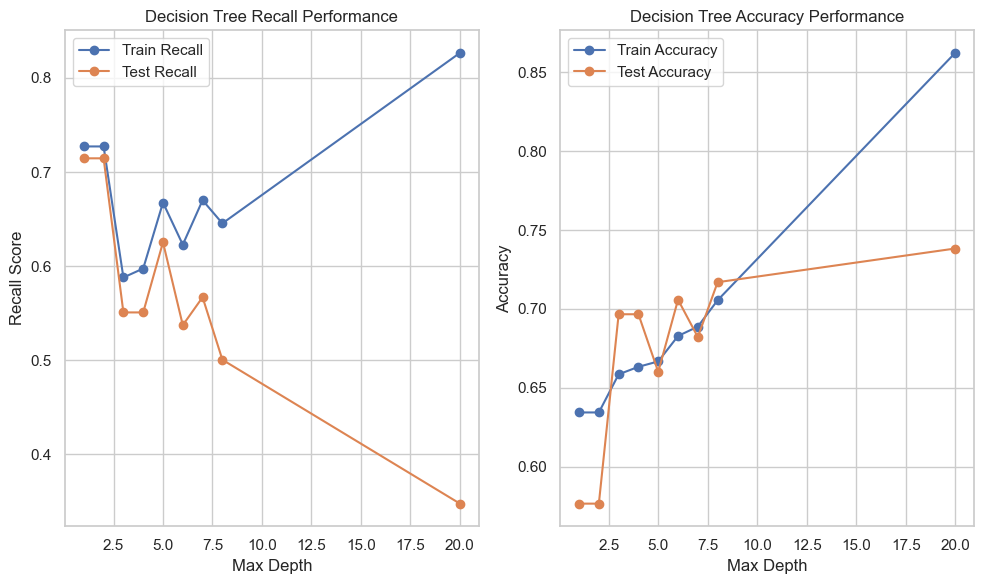

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize empty lists to store scores
train_recall_scores = []
test_recall_scores = []
train_accuracy_scores = []
test_accuracy_scores = []

# Range of values for max_depth
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8,20]

# Iterate over different values of max_depth
for max_depth in max_depth_range:
    # Initialize Decision Tree Classifier with the current max_depth value
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    
    # Fit the model on the training set
    dt_classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training set
    y_train_pred = dt_classifier.predict(X_train_resampled)
    
    # Make predictions on the testing set
    y_test_pred = dt_classifier.predict(X_test_scaled)
    
    # Calculate and append training and testing recall scores
    train_recall = recall_score(y_train_resampled, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)
    
    # Calculate and append training and testing accuracy scores
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plotting results
plt.figure(figsize=(10, 6))

# Plot Recall Scores
plt.subplot(1, 2, 1)
plt.plot(max_depth_range, train_recall_scores, label='Train Recall', marker='o')
plt.plot(max_depth_range, test_recall_scores, label='Test Recall', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Recall Score')
plt.title('Decision Tree Recall Performance')
plt.grid(True)
plt.legend()

# Plot Accuracy Scores
plt.subplot(1, 2, 2)
plt.plot(max_depth_range, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(max_depth_range, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy Performance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
test_recall_scores

[0.7145446698316789,
 0.7145446698316789,
 0.5507121277514027,
 0.5507121277514027,
 0.6252913249892101,
 0.5371601208459215,
 0.56685369011653,
 0.5003884333189469,
 0.3474320241691843]

### Logistic Regression

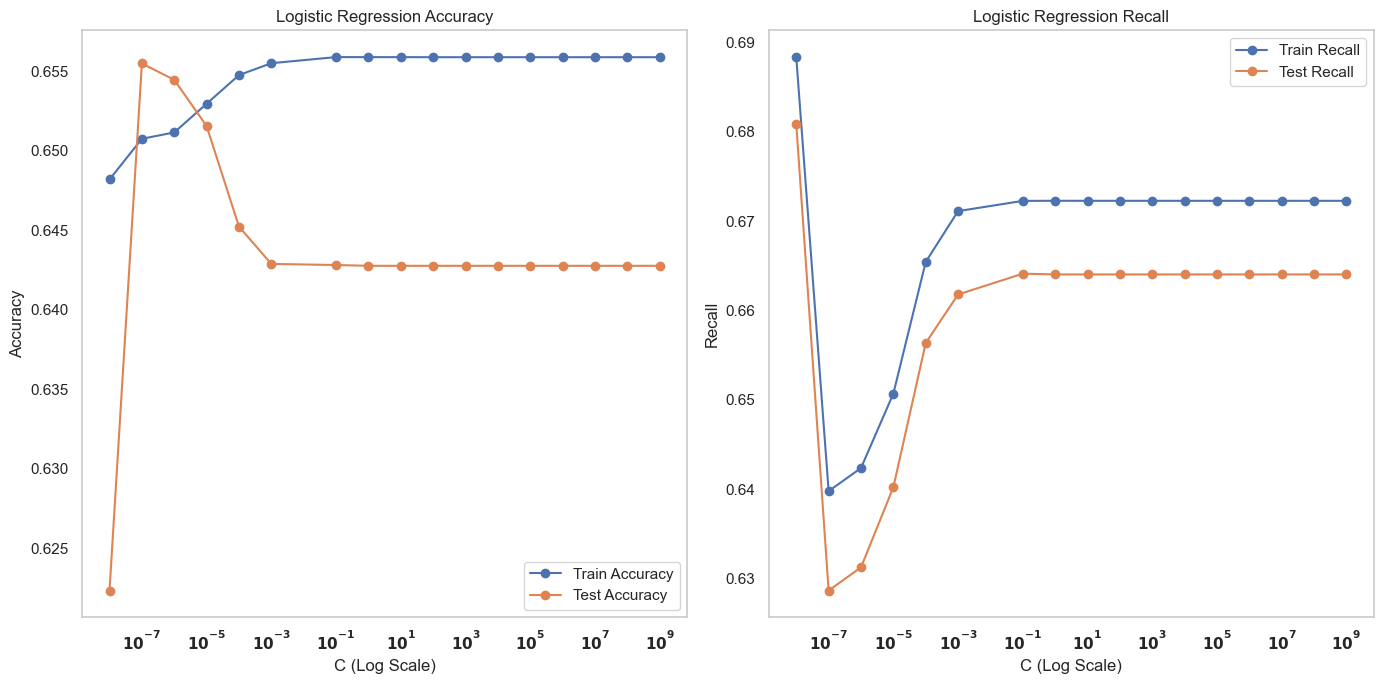

In [82]:
from sklearn.metrics import recall_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

# Lists to store scores
train_accuracy_scores = []
test_accuracy_scores = []
train_recall_scores = []
test_recall_scores = []

# Iterate over different values of C
for C_value in C_range:
    # Initialize Logistic Regression model with the current C value
    model = LogisticRegression(C=C_value, random_state=10)

    # Fit the model on the resampled training set
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test_scaled)

    # Append accuracy and recall scores to the respective lists
    train_accuracy_scores.append(accuracy_score(y_train_resampled, y_train_pred))
    test_accuracy_scores.append(accuracy_score(y_test, y_test_pred))
    train_recall_scores.append(recall_score(y_train_resampled, y_train_pred))
    test_recall_scores.append(recall_score(y_test, y_test_pred))

# Plotting results
plt.figure(figsize=(14, 7))

# Plot Accuracy Scores
plt.subplot(1, 2, 1)
plt.plot(C_range, train_accuracy_scores, label='Train Accuracy', marker='o')
plt.plot(C_range, test_accuracy_scores, label='Test Accuracy', marker='o')
plt.xlabel('C (Log Scale)')
plt.ylabel('Accuracy')
plt.xscale("log")
plt.title('Logistic Regression Accuracy')
plt.grid()
plt.legend()

# Plot Recall Scores
plt.subplot(1, 2, 2)
plt.plot(C_range, train_recall_scores, label='Train Recall', marker='o')
plt.plot(C_range, test_recall_scores, label='Test Recall', marker='o')
plt.xlabel('C (Log Scale)')
plt.ylabel('Recall')
plt.xscale("log")
plt.title('Logistic Regression Recall')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


### Model Coefficients - Logistics Regression

In [83]:
coefficients = model.coef_[0]

In [84]:
print(coefficients)

[ 0.19195718  0.23583307 -0.29147954  0.1840445   0.06668206  0.03602687
 -0.16536437  0.16663493 -0.03698194 -0.04412309 -0.02049384  0.10088413
  0.16664187  0.13794669  0.27537349  0.30224408  0.26047717  0.17159937
  0.09397692 -0.05337224  0.00252237  0.00389394 -0.00225517  0.0571966
 -0.01698847  0.01034745 -0.03019974]


In [85]:
# Get coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train_resampled.columns

# Pair coefficients with feature names and create a DataFrame
feature_importance_df = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Drop the absolute value column and round the coefficients
feature_importance_df.drop(columns=['Abs_Coefficient'], inplace=True)
feature_importance_df['Coefficient'] = feature_importance_df['Coefficient'].round(decimals=2)

# Display the DataFrame
print(feature_importance_df)

                        Feature  Coefficient
15                      grade_D         0.30
2                    annual_inc        -0.29
14                      grade_C         0.28
16                      grade_E         0.26
1                      int_rate         0.24
0                     loan_amnt         0.19
3                           dti         0.18
17                      grade_F         0.17
12              term_ 60 months         0.17
7                    revol_util         0.17
6                     revol_bal        -0.17
13                      grade_B         0.14
11                         year         0.10
18                      grade_G         0.09
4                      open_acc         0.07
23          home_ownership_RENT         0.06
19      home_ownership_MORTGAGE        -0.05
9          pub_rec_bankruptcies        -0.04
8                      mort_acc        -0.04
5                       pub_rec         0.04
26       application_type_JOINT        -0.03
10        

In [86]:
# Get coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train_resampled.columns

# List of log-transformed features
log_transformed_features = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_bal', 'revol_util', 'mort_acc']

# Pair coefficients with feature names and create a DataFrame
feature_importance_df = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

# Mark log-transformed features
feature_importance_df['Transformed'] = feature_importance_df['Feature'].apply(lambda x: 'Log' if x in log_transformed_features else 'None')

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Drop the absolute value column and round the coefficients
feature_importance_df.drop(columns=['Abs_Coefficient'], inplace=True)
feature_importance_df['Coefficient'] = feature_importance_df['Coefficient'].round(decimals=2)

# Display the DataFrame
print(feature_importance_df)

                        Feature  Coefficient Transformed
15                      grade_D         0.30        None
2                    annual_inc        -0.29         Log
14                      grade_C         0.28        None
16                      grade_E         0.26        None
1                      int_rate         0.24         Log
0                     loan_amnt         0.19         Log
3                           dti         0.18         Log
17                      grade_F         0.17        None
12              term_ 60 months         0.17        None
7                    revol_util         0.17         Log
6                     revol_bal        -0.17         Log
13                      grade_B         0.14        None
11                         year         0.10        None
18                      grade_G         0.09        None
4                      open_acc         0.07        None
23          home_ownership_RENT         0.06        None
19      home_ownership_MORTGAGE

In [87]:
# Get coefficients and feature names
coefficients = model.coef_[0]
feature_names = X_train_resampled.columns

# List of log-transformed features
log_transformed_features = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_bal', 'revol_util', 'mort_acc']

# Pair coefficients with feature names and create a DataFrame
feature_importance_df = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

# Calculate Odds Ratios and add to the DataFrame
feature_importance_df['Odds Ratio'] = np.exp(feature_importance_df['Coefficient']).round(decimals=2)

# Mark log-transformed features
feature_importance_df['Transformed'] = feature_importance_df['Feature'].apply(lambda x: 'Log' if x in log_transformed_features else 'None')

# Sort the DataFrame by the absolute value of the coefficients
feature_importance_df.sort_values(by='Odds Ratio', ascending=False, inplace=True)

# Display the DataFrame
print(feature_importance_df[['Feature', 'Coefficient', 'Odds Ratio', 'Transformed']])

                        Feature  Coefficient  Odds Ratio Transformed
15                      grade_D     0.302244        1.35        None
14                      grade_C     0.275373        1.32        None
16                      grade_E     0.260477        1.30        None
1                      int_rate     0.235833        1.27         Log
0                     loan_amnt     0.191957        1.21         Log
3                           dti     0.184045        1.20         Log
17                      grade_F     0.171599        1.19        None
12              term_ 60 months     0.166642        1.18        None
7                    revol_util     0.166635        1.18         Log
13                      grade_B     0.137947        1.15        None
11                         year     0.100884        1.11        None
18                      grade_G     0.093977        1.10        None
4                      open_acc     0.066682        1.07        None
23          home_ownership_RENT   

### Neural Networks






1853/1853 [==============================] - 3s 2ms/step


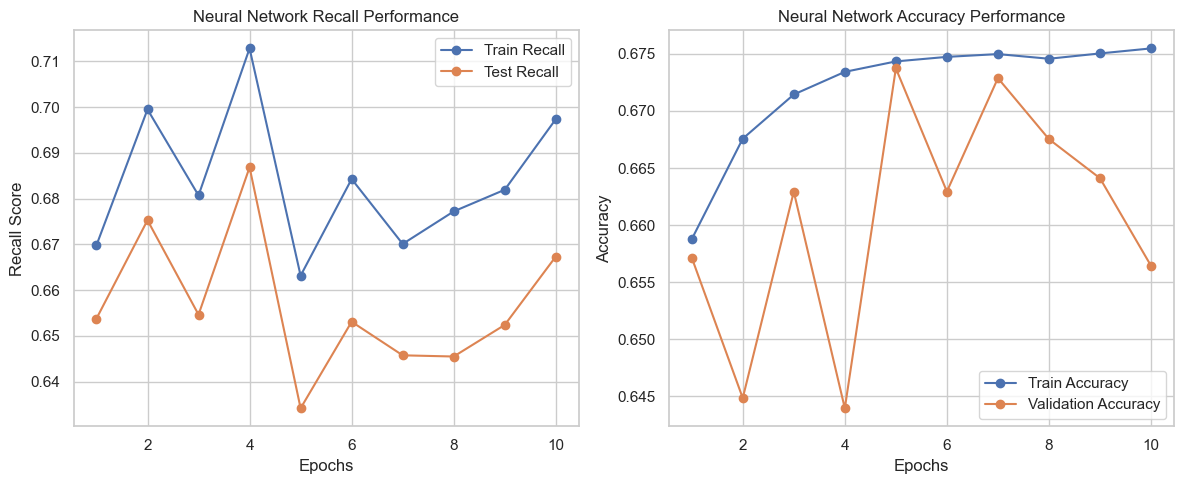

In [88]:
import tensorflow as tf
from sklearn.metrics import recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Custom Callback for Recall
class RecallCallback(tf.keras.callbacks.Callback):
    def __init__(self, train_data, train_labels, test_data, test_labels):
        super(RecallCallback, self).__init__()
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.train_recall = []
        self.test_recall = []

    def on_epoch_end(self, epoch, logs=None):
        train_predictions = (self.model.predict(self.train_data) > 0.5).astype("int32")
        test_predictions = (self.model.predict(self.test_data) > 0.5).astype("int32")
        self.train_recall.append(recall_score(self.train_labels, train_predictions))
        self.test_recall.append(recall_score(self.test_labels, test_predictions))

# Function to create a less complex neural network model
def create_model(num_features):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(num_features,)),  # Fewer neurons
        tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

#  num_features is the number of features in input data
num_features = X_train_resampled.shape[1]

# Create and train the model
model = create_model(num_features)
recall_callback = RecallCallback(X_train_resampled, y_train_resampled, X_test_scaled, y_test)
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, validation_data=(X_test_scaled, y_test), verbose=0, callbacks=[recall_callback])

# Plotting results
plt.figure(figsize=(12, 5))

# Plot Recall
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), recall_callback.train_recall, label='Train Recall', marker='o')
plt.plot(range(1, 11), recall_callback.test_recall, label='Test Recall', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Recall Score')
plt.title('Neural Network Recall Performance')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(range(1, 11), history.history.get('val_accuracy', []), label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Accuracy Performance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

**Below table shows comparison of accuracies in various models**

| Model                     | Best Accuracy Score |
|---------------------------|---------------------|
| Logistic Regression       | 67.10%              |
| Decision Trees            | 68.00%              |
| XGBoost                   | 66.90%              |
| CatBoost                  | 63.00%              |
| Neural Networks           | 67.70%              |


* Among the models considered for loan default prediction, Decision Trees demonstrate the highest accuracy at 68.00%, closely followed by Logistic Regression and Neural Networks, both achieving almost equal accuracy levels.

* Considering recall scores for loan prediction, as opposed to solely focusing on accuracy, is crucial for several reasons:

* Accuracy measures the proportion of true results (both true positives and true negatives) among the total number of cases examined. It's a general measure of how often the model is correct.

* Recall measures the proportion of actual positives (e.g., defaulters) that are correctly identified. It specifically focuses on the model's ability to detect defaulted cases.

**Importance of Recall in Loan Prediction:**

* Mitigating Financial Risks: In loan prediction, missing a potential defaulter (a false negative) can be costlier than wrongly identifying a non-defaulter as a defaulter (a false positive). Recall emphasizes reducing these false negatives.
* Regulatory Compliance: Financial institutions often face regulatory requirements to manage and minimize credit risks effectively. High recall ensures that risky loans are identified more accurately.
* Balancing Profit and Risk: While accuracy provides an overall effectiveness of the model, recall specifically helps in balancing the portfolio's risk by accurately identifying higher-risk loans.

**Limitations of Accuracy:**

**Imbalanced Datasets:** Loan datasets often have more non-defaulters than defaulters. In such scenarios, a model might appear highly accurate by predominantly predicting the majority class (non-defaulters) while failing to correctly identify the critical minority class (defaulters).
**Misleading Performance Metrics:** High accuracy might give a false sense of security about the model's performance. It doesn't reflect how well the model is capturing the critical cases of defaulters.


**Comparison of Recall scores for different models**

| Model                     | Best Recall Score | Hyperparameter   |
|---------------------------|-------------------|------------------|
| Logistic Regression       | 66.20%            | C = 0.1          |
| Decision Trees            | 71.40%            | Max depth = 2    |
| XGBoost                   | 60.50%            | Estimators = 3   |
| CatBoost                  | 63.00%            | Estimators = 7   |
| Neural Networks           | 67.70%            | Epochs = 5       |

The table presents the performance results of different models along with their respective best recall scores and hyperparameters.
* Logistic Regression, with a hyperparameter value of C = 0.1, achieved a recall score of 66.20%.
* Decision Trees with a maximum depth of 2 obtained a higher recall score of 71.40%.
* XGBoost with 3 estimators achieved a recall score of 60.50%.
* CatBoost with 7 estimators obtained a recall score of 63.00%.
* Neural Networks with 5 epochs achieved a recall score of 67.70%.
* The best recall score indicates the model's ability to correctly identify positive cases or 'True Positives' in the classification task.
* The results suggest that Decision Trees achieved the highest recall score among the models listed, making it a favorable choice for this classification task.

**Best Model**

- We can save the best model in the form of a pkl file.

In this case, we have Decision trees as the best performing model. We import joblib to dump the model.
DecisionTreeClassifier


In [115]:
# save the model using `joblib`
import joblib

best_model = DecisionTreeClassifier(max_depth=2, random_state=1)

best_model = LogisticRegression(C=0.1,random_state=10)

# Fit the model on the training set
best_model.fit(X_train_resampled, y_train_resampled)

# saving as pkl file
model_DT = 'best_model.pkl'

# Save the model to a .pkl file
joblib.dump(model_DT, 'C:/Users/botch_yp7a42y/OneDrive/Desktop/Learning/mygitrepo/best_model.pkl')

['C:/Users/botch_yp7a42y/OneDrive/Desktop/Learning/mygitrepo/best_model.pkl']

In [90]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539996 entries, 0 to 539995
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    539996 non-null  float64
 1   int_rate                     539996 non-null  float64
 2   annual_inc                   539996 non-null  float64
 3   dti                          539996 non-null  float64
 4   open_acc                     539996 non-null  float64
 5   pub_rec                      539996 non-null  float64
 6   revol_bal                    539996 non-null  float64
 7   revol_util                   539996 non-null  float64
 8   mort_acc                     539996 non-null  float64
 9   pub_rec_bankruptcies         539996 non-null  float64
 10  month                        539996 non-null  float64
 11  year                         539996 non-null  float64
 12  term_ 60 months              539996 non-null  float64
 13 

In [91]:
X_train_resampled.head(1)

loan_amnt  int_rate  annual_inc       dti  open_acc   pub_rec  revol_bal  \
0  -0.214295  -1.42518    -0.35918 -1.843693 -1.230943 -0.333519  -0.458082   

   revol_util  mort_acc  pub_rec_bankruptcies     month      year  \
0   -0.417303 -1.350916             -0.342142 -1.620804  0.246372   

   term_ 60 months   grade_B   grade_C   grade_D   grade_E   grade_F  \
0        -0.558821 -0.644032 -0.604698 -0.436804 -0.294431 -0.174735   

    grade_G  home_ownership_MORTGAGE  home_ownership_NONE  \
0 -0.088043                -1.002247            -0.008275   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0             -0.016187           -0.324309             1.216184   

   initial_list_status_w  application_type_INDIVIDUAL  application_type_JOINT  
0               1.226215                     0.042546               -0.033116

In [116]:
best_model.predict(X_train_resampled.head(3))

array([0, 0, 1], dtype=int64)

In [93]:
type(X_train_resampled)

pandas.core.frame.DataFrame

In [117]:
X_train_resampled.loc[2]

loan_amnt                      0.382418
int_rate                       1.272567
annual_inc                     0.112961
dti                           -0.535449
open_acc                      -1.036155
pub_rec                        1.533927
revol_bal                     -0.326891
revol_util                     0.318765
mort_acc                       0.665779
pub_rec_bankruptcies           2.465669
month                         -1.620804
year                           0.246372
term_ 60 months                1.789482
grade_B                       -0.644032
grade_C                       -0.604698
grade_D                        2.289355
grade_E                       -0.294431
grade_F                       -0.174735
grade_G                       -0.088043
home_ownership_MORTGAGE       -1.002247
home_ownership_NONE           -0.008275
home_ownership_OTHER          -0.016187
home_ownership_OWN            -0.324309
home_ownership_RENT            1.216184
initial_list_status_w         -0.815518


In [95]:
type(X_train_resampled.loc[2])

pandas.core.series.Series

In [96]:
list(X_train_resampled.iloc[8])

[0.805792803689083,
 -1.4288645671457911,
 -0.029233557516298178,
 -0.4872143699372647,
 0.5221477085895746,
 1.5339267039431508,
 0.3507801199419697,
 -0.10626794187873878,
 -1.3509160965328586,
 2.465668788765615,
 -0.7451096176096544,
 0.9288598606160049,
 -0.5588208626923589,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 -1.0022469996354437,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 1.2161843612342147,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765]

## Next Steps

* The next steps involve refining the model through advanced hyperparameter tuning. 
* In this project, we performed limited hyperparameter tuning. 
* We can experiment with adjusting the classification thresholds. 
* A challenge encountered was the excessive complexity of the models in relation to my dataset, necessitating the simplification of models by adjusting various hyperparameters. 
* Further analysis could include examining time series and geographic data. 
* There's also scope for enhanced feature engineering. 
* Additionally, developing a credit scoring model is another avenue to explore.
* Developing a web app for demonstrating prediction of loan performance over the tenor.

In [97]:
best_model.predict([15000.0,
                    6.00,
                    100000.0,
                    3.0,
                    1,
                    1,
                    100,
                    2,
                    2,
                    1,])

ValueError: Expected 2D array, got 1D array instead:
array=[1.5e+04 6.0e+00 1.0e+05 3.0e+00 1.0e+00 1.0e+00 1.0e+02 2.0e+00 2.0e+00
 1.0e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
loan_amnt = 0.382418
int_rate  = 1.272567
annual_inc  = 0.112961
dti          = -0.535449
open_acc                      -1.036155
pub_rec                        1.533927
revol_bal                     -0.326891
revol_util                     0.318765
mort_acc                       0.665779
pub_rec_bankruptcies           2.465669
month                         -1.620804
year                           0.246372
term_ 60 months                1.789482
grade_B                       -0.644032
grade_C                       -0.604698
grade_D                        2.289355
grade_E                       -0.294431
grade_F                       -0.174735
grade_G                       -0.088043
home_ownership_MORTGAGE       -1.002247
home_ownership_NONE           -0.008275
home_ownership_OTHER          -0.016187
home_ownership_OWN            -0.324309
home_ownership_RENT            1.216184
initial_list_status_w         -0.815518
application_type_INDIVIDUAL    0.042546
application_type_JOINT        -0.033116

In [127]:
demo_series = [10000,8.2,80000,2,10,0,10000,4000,1,0,1,2015,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0]

demo_series = [40000,16.2,8000,2,10,0,10000,4000,1,0,1,2015,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0]

demo_df = pd.DataFrame([demo_series])

demo_scaled = scaler.transform(demo_df)

print(type(demo_scaled))

print(demo_scaled)

demo_scaled_df = pd.DataFrame(demo_scaled)

best_model.predict(demo_scaled_df)

<class 'numpy.ndarray'>
[[ 5.88532638e+04  3.96886078e+01  1.51351081e+04 -7.36130629e-01
  -2.57003694e-01 -3.33519366e-01  4.07812316e+03  1.88669317e+03
   7.53363161e-01 -3.42141728e-01 -1.62080427e+00  9.28859861e-01
   1.78948222e+00 -6.44031933e-01 -6.04698366e-01 -4.36804208e-01
  -2.94431181e-01  5.72295688e+00 -8.80429776e-02 -1.00224700e+00
   1.20850788e+02 -1.61871337e-02 -3.24308860e-01 -8.22243758e-01
   1.22621505e+00  4.25460052e-02 -3.31156771e-02]]


array([1], dtype=int64)

In [ ]:
type(X_test)

In [120]:
best_model.predict(pd.DataFrame([[0.7514535962915077,
 1.010561656351036,
 0.16787863949863432,
 0.2713714846956284,
 -0.6465793955220825,
 -0.33351936644141356,
 -0.05879364730750862,
 0.2209717290090922,
 0.7871963523535884,
 -0.3421417278860765,
 -0.16131317973093673,
 0.9288598606160049,
 1.7894822236630024,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 3.3963794122099005,
 -0.1747348477552755,
 -0.08804297764335842,
 0.9977580380522357,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 -0.8222437583272116,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765],[-0.2142951410515851,
 -0.42540436747793614,
 -0.46957120135808256,
 0.2742026543845117,
 0.13257200721902218,
 -0.33351936644141356,
 0.20246654449774937,
 0.20185547183434752,
 0.6657791972519614,
 -0.3421417278860765,
 -0.16131317973093673,
 -0.4361155165046951,
 -0.5588208626923589,
 1.552718039977796,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 0.9977580380522357,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 -0.8222437583272116,
 -0.8155176388988521,
 0.04254600517995226,
 -0.033115677123226765], [0.805792803689083,
 -1.4288645671457911,
 -0.029233557516298178,
 -0.4872143699372647,
 0.5221477085895746,
 1.5339267039431508,
 0.3507801199419697,
 -0.10626794187873878,
 -1.3509160965328586,
 2.465668788765615,
 -0.7451096176096544,
 0.9288598606160049,
 -0.5588208626923589,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 -1.0022469996354437,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 1.2161843612342147,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765] , [ 1.45790689e+03,  7.68922528e+00,  1.51539790e+05, -1.80829397e+00,
  -2.01009435e+00, -3.33519366e-01,  4.07812316e+03,  1.53396816e-01,
   7.53363161e-01, -3.42141728e-01, -1.62080427e+00,  9.28859861e-01,
   1.78948222e+00, -6.44031933e-01, -6.04698366e-01, -4.36804208e-01,
  -2.94431181e-01, -1.74734848e-01, -8.80429776e-02, -1.00224700e+00,
   1.20850788e+02, -1.61871337e-02, -3.24308860e-01, -8.22243758e-01,
   1.22621505e+00,  4.25460052e-02, -3.31156771e-02]   ]))

array([1, 0, 0, 0], dtype=int64)

In [128]:
best_model.predict_proba(pd.DataFrame([[0.7514535962915077,
 1.010561656351036,
 0.16787863949863432,
 0.2713714846956284,
 -0.6465793955220825,
 -0.33351936644141356,
 -0.05879364730750862,
 0.2209717290090922,
 0.7871963523535884,
 -0.3421417278860765,
 -0.16131317973093673,
 0.9288598606160049,
 1.7894822236630024,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 3.3963794122099005,
 -0.1747348477552755,
 -0.08804297764335842,
 0.9977580380522357,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 -0.8222437583272116,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765],[-0.2142951410515851,
 -0.42540436747793614,
 -0.46957120135808256,
 0.2742026543845117,
 0.13257200721902218,
 -0.33351936644141356,
 0.20246654449774937,
 0.20185547183434752,
 0.6657791972519614,
 -0.3421417278860765,
 -0.16131317973093673,
 -0.4361155165046951,
 -0.5588208626923589,
 1.552718039977796,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 0.9977580380522357,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 -0.8222437583272116,
 -0.8155176388988521,
 0.04254600517995226,
 -0.033115677123226765], [0.805792803689083,
 -1.4288645671457911,
 -0.029233557516298178,
 -0.4872143699372647,
 0.5221477085895746,
 1.5339267039431508,
 0.3507801199419697,
 -0.10626794187873878,
 -1.3509160965328586,
 2.465668788765615,
 -0.7451096176096544,
 0.9288598606160049,
 -0.5588208626923589,
 -0.644031932555057,
 -0.6046983657175465,
 -0.4368042075193865,
 -0.2944311805698222,
 -0.1747348477552755,
 -0.08804297764335842,
 -1.0022469996354437,
 -0.00827466674979133,
 -0.016187133663903164,
 -0.3243088602180947,
 1.2161843612342147,
 1.226215047108293,
 0.04254600517995226,
 -0.033115677123226765] , [ 5.88532638e+04,  3.96886078e+01,  1.51351081e+04, -7.36130629e-01,
  -2.57003694e-01, -3.33519366e-01,  4.07812316e+03,  1.88669317e+03,
   7.53363161e-01, -3.42141728e-01, -1.62080427e+00 , 9.28859861e-01,
   1.78948222e+00, -6.44031933e-01, -6.04698366e-01, -4.36804208e-01,
  -2.94431181e-01,  5.72295688e+00, -8.80429776e-02, -1.00224700e+00,
   1.20850788e+02, -1.61871337e-02, -3.24308860e-01, -8.22243758e-01,
   1.22621505e+00,  4.25460052e-02, -3.31156771e-02]   ]))

array([[0.28975428, 0.71024572],
       [0.64188538, 0.35811462],
       [0.70864603, 0.29135397],
       [0.        , 1.        ]])